# EDA Banking Credit Risk Analytics Case Study - Mandar Dhumal 

### Introduction
This is the banking credit risk analysis case study where in the bank wants to understand why are the major reason for the defaults in customer paying their Loans. Basically this study is to understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

### Business Objectives
This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.


In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

### Business Understanding

There are three data sets
- 1. Application Data,
- 2. Previous Application Data, and
- 3. Columns Description

The **Application data** set contains all the information of the client at the time of application. The data is about whether a client has payment difficulties.

The **Previous Application data** set contains information about the client’s previous loan data. It contains the data whether the previous application had been Approved, Cancelled, Refused or Unused offer.

The **Columns Description** is data dictionary which describes the meaning of the variables.


### Expected Outcomes

- Present the overall approach of the analysis in a presentation. Mention the problem statement and the analysis approach briefly.

- Identify the missing data and use appropriate method to deal with it. (Remove columns/or replace it with an appropriate value)

- Identify if there are outliers in the dataset. Also, mention why do you think it is an outlier. Again, remember that for this exercise, it is not necessary to remove any data points.

- Identify if there is data imbalance in the data. Find the ratio of data imbalance.

- Explain the results of univariate, segmented univariate, bivariate analysis, etc. in business terms.

- Find the top 10 correlation for the Client with payment difficulties and all other cases (Target variable). 

In [ ]:
#Importing all the required libraries
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
from matplotlib import cm
from matplotlib.colors import ListedColormap,LinearSegmentedColormap

In [2]:
#Importing warnings to ignore
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Reading datasets
# Setting display options to view all the columns
app_data = pd.read_csv("application_data.csv")
pre_data = pd.read_csv("previous_application.csv")
pd.set_option("display.max_columns",200)
pd.set_option("display.max_rows", 200)

In [4]:
# Checking first 5 data points from application dataset to have a view of data
app_data.sample(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
78037,190470,0,Cash loans,F,N,N,0,225000.0,1546020.0,40914.0,1350000.0,Unaccompanied,Commercial associate,Higher education,Separated,House / apartment,0.010556,-19124,-4517,-5443.0,-2685,NaN,1,1,0,1,0,0,Core staff,1.0,3,3,THURSDAY,13,0,0,0,0,0,0,Self-employed,0.729193,0.491994,0.436506,0.1464,0.1113,0.9806,0.7348,0.0721,0.0,0.2759,0.1667,0.2083,0.0814,0.1177,0.1071,0.0077,0.0264,0.1492,0.1155,0.9806,0.7452,0.0728,0.0,0.2759,0.1667,0.2083,0.0833,0.1286,0.1115,0.0078,0.0280,0.1478,0.1113,0.9806,0.7383,0.0726,0.0,0.2759,0.1667,0.2083,0.0828,0.1197,0.1090,0.0078,0.0270,reg oper account,block of flats,0.1294,"Stone, brick",No,1.0,0.0,1.0,0.0,-3631.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
53857,162401,0,Revolving loans,F,N,Y,0,157500.0,337500.0,16875.0,337500.0,Family,Pensioner,Secondary / secondary special,Married,House / apartment,0.031329,-20870,365243,-12003.0,-4289,NaN,1,0,0,1,0,0,NaN,2.0,2,2,WEDNESDAY,14,0,0,0,0,0,0,XNA,NaN,0.591926,0.647977,0.0237,NaN,0.9702,NaN,NaN,0.0,0.1034,0.0833,NaN,0.0596,NaN,0.0355,NaN,0.0074,0.0242,NaN,0.9702,NaN,NaN,0.0,0.1034,0.0833,NaN,0.0609,NaN,0.0370,NaN,0.0079,0.0239,NaN,0.9702,NaN,NaN,0.0,0.1034,0.0833,NaN,0.0606,NaN,0.0361,NaN,0.0076,NaN,block of flats,0.0255,Mixed,No,1.0,0.0,1.0,0.0,-2397.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,2.0
247849,386766,0,Cash loans,F,N,N,2,36000.0,206271.0,21789.0,193500.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.002134,-13406,-5294,-984.0,-2924,NaN,1,1,0,1,0,0,Core staff,4.0,3,3,SUNDAY,12,0,0,0,0,0,0,School,NaN,0.525347,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-2254.0,0

In [5]:
#Exploring the application data set to understand the data types
app_data.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [6]:
# Shape of application dataset
app_data.shape

(307511, 122)

In [7]:
# Application data Description
app_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [8]:
#Checking Null values in the dataset and sorting in descending value to get better understanding of Null values
(app_data.isnull().sum()/len(app_data)*100).sort_values(ascending=False)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

# Dealing with Null Values

### Dropping the columns 

The popular understanding that if a column has more than 50% of the data as null, we can delete that column. In this dataset, we can observe that the data with missing columns below 50% but above 40% belongs to the same kind of data (i.e mean,median,mode) of the building where the client live. So we can safely drop even these columns. Hence droping columns with more than 40% null values

In [9]:
appdata_nullvalues = (app_data.isnull().sum()/len(app_data)*100).sort_values(ascending=False)
appdata_nullvalmorethan40pct = appdata_nullvalues[appdata_nullvalues > 40].index

In [10]:
# Checking the shape of the dataframe of columns above 40% null values
appdata_nullvalmorethan40pct.shape

(49,)

In [11]:
# Droping the columns with more than 40% null values
app_data.drop(labels=appdata_nullvalmorethan40pct,axis=1,inplace=True)

In [12]:
# Checking the shape of the application dataset after droping the columns with above 40% null values
app_data.shape

(307511, 73)

In [13]:
app_data.isnull().sum().sort_values(ascending=False)

OCCUPATION_TYPE                96391
EXT_SOURCE_3                   60965
AMT_REQ_CREDIT_BUREAU_YEAR     41519
AMT_REQ_CREDIT_BUREAU_QRT      41519
AMT_REQ_CREDIT_BUREAU_MON      41519
AMT_REQ_CREDIT_BUREAU_WEEK     41519
AMT_REQ_CREDIT_BUREAU_DAY      41519
AMT_REQ_CREDIT_BUREAU_HOUR     41519
NAME_TYPE_SUITE                 1292
OBS_30_CNT_SOCIAL_CIRCLE        1021
DEF_30_CNT_SOCIAL_CIRCLE        1021
OBS_60_CNT_SOCIAL_CIRCLE        1021
DEF_60_CNT_SOCIAL_CIRCLE        1021
EXT_SOURCE_2                     660
AMT_GOODS_PRICE                  278
AMT_ANNUITY                       12
CNT_FAM_MEMBERS                    2
DAYS_LAST_PHONE_CHANGE             1
FLAG_DOCUMENT_17                   0
FLAG_DOCUMENT_18                   0
FLAG_DOCUMENT_21                   0
FLAG_DOCUMENT_20                   0
FLAG_DOCUMENT_19                   0
FLAG_DOCUMENT_2                    0
FLAG_DOCUMENT_3                    0
FLAG_DOCUMENT_4                    0
FLAG_DOCUMENT_5                    0
F

In [14]:
app_data.sample(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
19687,122955,0,Cash loans,F,N,Y,0,135000.0,743031.0,39717.0,688500.0,Family,Working,Higher education,Married,House / apartment,0.010147,-12839,-179,-915.0,-4758,1,1,0,1,0,0,High skill tech staff,2.0,2,2,THURSDAY,12,0,0,0,0,0,0,Business Entity Type 3,0.541064,NaN,0.0,0.0,0.0,0.0,-862.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
303059,451114,0,Cash loans,F,N,N,0,112500.0,269550.0,17559.0,225000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.010276,-10661,-131,-3333.0,-1174,1,1,0,1,0,0,Laborers,2.0,2,2,TUESDAY,18,0,0,0,1,1,0,Business Entity Type 1,0.749721,0.694093,6.0,0.0,6.0,0.0,-5.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
219421,354195,0,Cash loans,F,N,Y,0,180000.0,1762110.0,46480.5,1575000.0,Other_A,State servant,Higher education,Married,House / apartment,0.046220,-19239,-11337,-8149.0,-2773,1,1,0,1,0,0,Core staff,2.0,1,1,WEDNESDAY,14,0,1,1,0,0,0,School,0.733526,NaN,0.0,0.0,0.0,0.0,-2281.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
145344,268537,0,Cash loans,F,N,Y,0,90000.0,182448.0,14247.0,157500.0,Family,Working,Secondary / secondary special,Married,House / apartment,0.007330,-18223,-2535,-9713.0,-1747,1,1,0,1,0,0,Laborers,2.0,2,2,FRIDAY,11,0,0,0,0,0,0,Government,0.569653,0.757069,1.0,0.0,1.0,0.0,-1647.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,3.0
262561,404001,1,Cash loans,F,Y,Y,0,157500.0,423000.0,20704.5,423000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.009549,-13040,-1097,-1907.0,-2953,1,1,1,1,1,0,Waiters/barmen staff,2.0,2,2,THURSDAY,13,0,0,0,0,1,1,Self-employed,0.572583,0.116125,1.0,0.0,1.0,0.0,-1548.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,2.0,1.0


## Now we can deal with other columns with less than 40% null values

### OCCUPATION_TYPE column

Occupation_type column is a categorical column stating the Occupation of the customers and an important data point for the analysis to be done.
Hence records cannot be dropped. 

In [15]:
app_data.OCCUPATION_TYPE.value_counts(normalize=True,dropna=False)*100

NaN                      31.345545
Laborers                 17.946025
Sales staff              10.439301
Core staff                8.965533
Managers                  6.949670
Drivers                   6.049540
High skill tech staff     3.700681
Accountants               3.191105
Medicine staff            2.776161
Security staff            2.185613
Cooking staff             1.933589
Cleaning staff            1.513117
Private service staff     0.862408
Low-skill Laborers        0.680626
Waiters/barmen staff      0.438358
Secretaries               0.424375
Realty agents             0.244219
HR staff                  0.183083
IT staff                  0.171051
Name: OCCUPATION_TYPE, dtype: float64

**As the null values comprises of over 30% of the data, we can impute the missing values. In this case as the data is categorical, we can create a separate category of Not Known for null values**

In [16]:
app_data.OCCUPATION_TYPE.fillna("Not Known",inplace=True)
app_data.OCCUPATION_TYPE.value_counts(normalize=True,dropna=False)*100

Not Known                31.345545
Laborers                 17.946025
Sales staff              10.439301
Core staff                8.965533
Managers                  6.949670
Drivers                   6.049540
High skill tech staff     3.700681
Accountants               3.191105
Medicine staff            2.776161
Security staff            2.185613
Cooking staff             1.933589
Cleaning staff            1.513117
Private service staff     0.862408
Low-skill Laborers        0.680626
Waiters/barmen staff      0.438358
Secretaries               0.424375
Realty agents             0.244219
HR staff                  0.183083
IT staff                  0.171051
Name: OCCUPATION_TYPE, dtype: float64

### EXT_SOURCE_3 and EXT_SOURCE_2 columns

Both are continuous variable columns, so we can impute the NaN values with either mean or median values.



In [17]:
app_data.EXT_SOURCE_3.describe()

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

In [18]:
# Checking for the null values in EXT_SOURCE_3
app_data.EXT_SOURCE_3.value_counts(normalize=True,dropna=False)*100

NaN         19.825307
0.746300     0.474780
0.713631     0.427627
0.694093     0.414945
0.670652     0.387303
              ...    
0.028674     0.000325
0.025272     0.000325
0.021492     0.000325
0.014556     0.000325
0.043227     0.000325
Name: EXT_SOURCE_3, Length: 815, dtype: float64

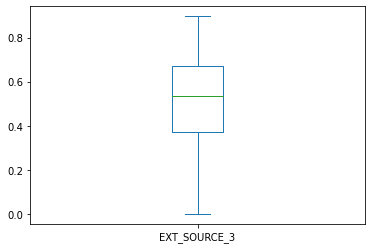

In [19]:
#Checking for Outliers
app_data.EXT_SOURCE_3.plot.box()
plt.show()

**Since the mean and median almost the same and no outliers, we can impute the mean value for the null values for EXT_SOURCE_3**

In [20]:
# Imputating the null values with mean
app_data.EXT_SOURCE_3.fillna(app_data.EXT_SOURCE_3.mean(),inplace=True)

In [21]:
# Re-checking to ensure that there are no null values
app_data.EXT_SOURCE_3.isnull().sum()

0

In [22]:
app_data.EXT_SOURCE_2.describe()

count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64

In [23]:
# Checking for the null values in EXT_SOURCE_2
app_data.EXT_SOURCE_2.value_counts(normalize=True,dropna=False)*100

0.285898    0.234463
NaN         0.214626
0.262258    0.135605
0.265256    0.111541
0.159679    0.104712
              ...   
0.004725    0.000325
0.257313    0.000325
0.282030    0.000325
0.181540    0.000325
0.267834    0.000325
Name: EXT_SOURCE_2, Length: 119832, dtype: float64

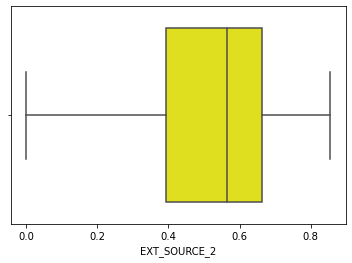

In [24]:
# Checking for Outliers as EXT_SOURCE_2 is continuous variable
sns.boxplot(app_data.EXT_SOURCE_2,color="Yellow")
plt.show()

**Since the mean and median are almost the same and the data is continuous variable, we can impute the mean/median values for the null values for EXT_SOURCE_2**

In [25]:
# Imputing the null values with median values for EXT_SOURCE_2
app_data.EXT_SOURCE_2.fillna(app_data.EXT_SOURCE_2.median(),inplace=True)

In [26]:
# Re-checking to ensure that there are no null values
app_data.EXT_SOURCE_2.isnull().sum()

0

### AMT_REQ_CREDIT_BUREAU YEAR, QRT, MON, WEEK, DAY, HOUR Columns

**The data is these columns consists the number of Credit Bureau queries about the client before the loan application captured in different time frames**

In [27]:
app_data.AMT_REQ_CREDIT_BUREAU_YEAR.describe()

count    265992.000000
mean          1.899974
std           1.869295
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

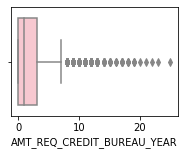

In [28]:
# Checking for Outliers with Box plot
plt.figure(figsize=(3,2))
sns.boxplot(app_data.AMT_REQ_CREDIT_BUREAU_YEAR,color="Pink")
plt.show()

**The above column has outliers, so we can impute the NaN values with median**

In [29]:
app_data.AMT_REQ_CREDIT_BUREAU_QRT.describe()

count    265992.000000
mean          0.265474
std           0.794056
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

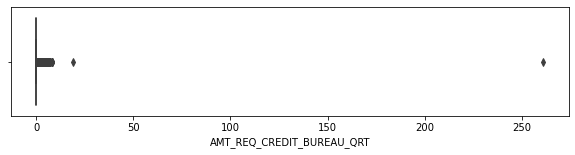

In [30]:
# Checking for Outliers with use of boxplot
plt.figure(figsize=(10,2))
sns.boxplot(app_data.AMT_REQ_CREDIT_BUREAU_QRT,color="Brown")
plt.show()

**The above column has outliers, hence we can impute the median values in place of NaN values**

In [31]:
app_data.AMT_REQ_CREDIT_BUREAU_MON.describe()

count    265992.000000
mean          0.267395
std           0.916002
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          27.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

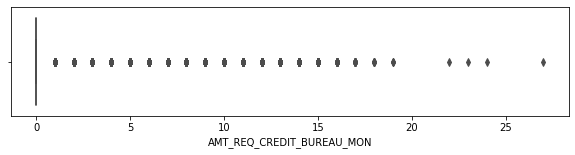

In [32]:
# Checking for Outliers with Boxplot
plt.figure(figsize=(10,2))
sns.boxplot(app_data.AMT_REQ_CREDIT_BUREAU_MON,color="Yellow")
plt.show()

**The above column has outliers, hence we can impute the median values in place of NaN values**

In [33]:
app_data.AMT_REQ_CREDIT_BUREAU_WEEK.describe()

count    265992.000000
mean          0.034362
std           0.204685
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

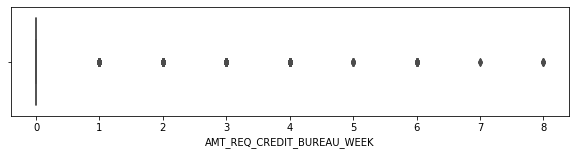

In [34]:
# Checking for outliers with boxplot
plt.figure(figsize=(10,2))
sns.boxplot(app_data.AMT_REQ_CREDIT_BUREAU_WEEK,color="Yellow")
plt.show()

**The above column has outliers, hence we can impute the median values in place of NaN values**

In [35]:
app_data.AMT_REQ_CREDIT_BUREAU_DAY.describe()

count    265992.000000
mean          0.007000
std           0.110757
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

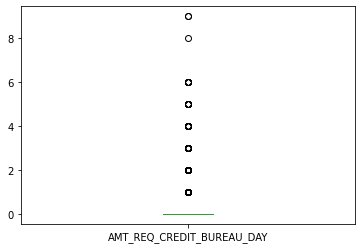

In [36]:
# Checking for the outliers in the column with boxplot
app_data.AMT_REQ_CREDIT_BUREAU_DAY.plot.box()
plt.show()

**The above column has outliers, hence we can impute the median values in place of NaN values**

In [37]:
app_data.AMT_REQ_CREDIT_BUREAU_HOUR.describe()

count    265992.000000
mean          0.006402
std           0.083849
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

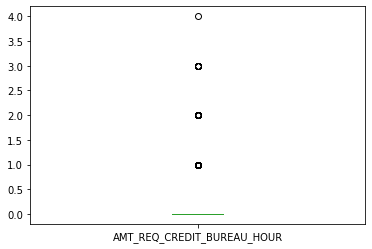

In [38]:
#Checking for Outliers in the data column
app_data.AMT_REQ_CREDIT_BUREAU_HOUR.plot.box()
plt.show()

**Since the data is continuous and haveing outliers, we can fill missing NaN with Median value for these columns**

In [39]:
# Filling NaN values with median values for the above columns
app_data.AMT_REQ_CREDIT_BUREAU_YEAR.fillna(app_data.AMT_REQ_CREDIT_BUREAU_YEAR.median(),inplace=True)
app_data.AMT_REQ_CREDIT_BUREAU_QRT.fillna(app_data.AMT_REQ_CREDIT_BUREAU_QRT.median(),inplace=True)
app_data.AMT_REQ_CREDIT_BUREAU_MON.fillna(app_data.AMT_REQ_CREDIT_BUREAU_MON.median(),inplace=True)
app_data.AMT_REQ_CREDIT_BUREAU_WEEK.fillna(app_data.AMT_REQ_CREDIT_BUREAU_WEEK.median(),inplace=True)
app_data.AMT_REQ_CREDIT_BUREAU_DAY.fillna(app_data.AMT_REQ_CREDIT_BUREAU_DAY.median(),inplace=True)
app_data.AMT_REQ_CREDIT_BUREAU_HOUR.fillna(app_data.AMT_REQ_CREDIT_BUREAU_HOUR.median(),inplace=True)

In [40]:
# Checking the above code has worked and also to check columns with remaining NaN values 
app_data.isnull().sum().sort_values(ascending=False)

NAME_TYPE_SUITE                1292
OBS_30_CNT_SOCIAL_CIRCLE       1021
DEF_30_CNT_SOCIAL_CIRCLE       1021
OBS_60_CNT_SOCIAL_CIRCLE       1021
DEF_60_CNT_SOCIAL_CIRCLE       1021
AMT_GOODS_PRICE                 278
AMT_ANNUITY                      12
CNT_FAM_MEMBERS                   2
DAYS_LAST_PHONE_CHANGE            1
FLAG_DOCUMENT_4                   0
FLAG_DOCUMENT_8                   0
FLAG_DOCUMENT_7                   0
FLAG_DOCUMENT_6                   0
FLAG_DOCUMENT_5                   0
SK_ID_CURR                        0
FLAG_DOCUMENT_3                   0
FLAG_DOCUMENT_10                  0
FLAG_DOCUMENT_2                   0
EXT_SOURCE_3                      0
FLAG_DOCUMENT_9                   0
FLAG_DOCUMENT_12                  0
FLAG_DOCUMENT_11                  0
FLAG_DOCUMENT_20                  0
AMT_REQ_CREDIT_BUREAU_QRT         0
AMT_REQ_CREDIT_BUREAU_MON         0
AMT_REQ_CREDIT_BUREAU_WEEK        0
AMT_REQ_CREDIT_BUREAU_DAY         0
AMT_REQ_CREDIT_BUREAU_HOUR  

### NAME_TYPE_SUITE Column

**This column captures the data of persons accompanying the customer while applying for the loan**

In [41]:
# Checking values counts of the column
app_data.NAME_TYPE_SUITE.value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

**Since the column is categorical, and NaN values are less than 0.5%, we can add these values to the largest category which is Unaccompanied**

In [42]:
# Since the majority is "Unaccompanied", we can fill the missing values with it
app_data.NAME_TYPE_SUITE.fillna("Unaccompanied",inplace=True)

In [43]:
app_data.isnull().sum().sort_values(ascending=False)

OBS_30_CNT_SOCIAL_CIRCLE       1021
DEF_30_CNT_SOCIAL_CIRCLE       1021
OBS_60_CNT_SOCIAL_CIRCLE       1021
DEF_60_CNT_SOCIAL_CIRCLE       1021
AMT_GOODS_PRICE                 278
AMT_ANNUITY                      12
CNT_FAM_MEMBERS                   2
DAYS_LAST_PHONE_CHANGE            1
FLAG_DOCUMENT_4                   0
FLAG_DOCUMENT_8                   0
FLAG_DOCUMENT_7                   0
FLAG_DOCUMENT_6                   0
FLAG_DOCUMENT_5                   0
SK_ID_CURR                        0
FLAG_DOCUMENT_3                   0
FLAG_DOCUMENT_2                   0
FLAG_DOCUMENT_10                  0
EXT_SOURCE_3                      0
EXT_SOURCE_2                      0
FLAG_DOCUMENT_9                   0
FLAG_DOCUMENT_11                  0
LIVE_CITY_NOT_WORK_CITY           0
FLAG_DOCUMENT_20                  0
AMT_REQ_CREDIT_BUREAU_QRT         0
AMT_REQ_CREDIT_BUREAU_MON         0
AMT_REQ_CREDIT_BUREAU_WEEK        0
AMT_REQ_CREDIT_BUREAU_DAY         0
AMT_REQ_CREDIT_BUREAU_HOUR  

### OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE Columns

**To start we can describe the above columns as they are similar in nature**

In [44]:
app_data.OBS_30_CNT_SOCIAL_CIRCLE.describe()

count    306490.000000
mean          1.422245
std           2.400989
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [45]:
app_data.DEF_30_CNT_SOCIAL_CIRCLE.describe()

count    306490.000000
mean          0.143421
std           0.446698
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          34.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [46]:
app_data.OBS_60_CNT_SOCIAL_CIRCLE.describe()

count    306490.000000
mean          1.405292
std           2.379803
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         344.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64

In [47]:
app_data.DEF_60_CNT_SOCIAL_CIRCLE.describe()

count    306490.000000
mean          0.100049
std           0.362291
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          24.000000
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64

**Since the data is numerical, we can fill missing NaN with Median value for these columns**

In [48]:
app_data.OBS_30_CNT_SOCIAL_CIRCLE.fillna(app_data.OBS_30_CNT_SOCIAL_CIRCLE.median(),inplace=True)
app_data.OBS_60_CNT_SOCIAL_CIRCLE.fillna(app_data.OBS_60_CNT_SOCIAL_CIRCLE.median(),inplace=True)
app_data.DEF_30_CNT_SOCIAL_CIRCLE.fillna(app_data.DEF_30_CNT_SOCIAL_CIRCLE.median(),inplace=True)
app_data.DEF_60_CNT_SOCIAL_CIRCLE.fillna(app_data.DEF_60_CNT_SOCIAL_CIRCLE.median(),inplace=True)

In [49]:
app_data.isnull().sum().sort_values(ascending=False)

AMT_GOODS_PRICE                278
AMT_ANNUITY                     12
CNT_FAM_MEMBERS                  2
DAYS_LAST_PHONE_CHANGE           1
FLAG_DOCUMENT_2                  0
FLAG_DOCUMENT_8                  0
FLAG_DOCUMENT_7                  0
FLAG_DOCUMENT_6                  0
FLAG_DOCUMENT_5                  0
FLAG_DOCUMENT_4                  0
FLAG_DOCUMENT_3                  0
SK_ID_CURR                       0
FLAG_DOCUMENT_10                 0
DEF_60_CNT_SOCIAL_CIRCLE         0
OBS_60_CNT_SOCIAL_CIRCLE         0
DEF_30_CNT_SOCIAL_CIRCLE         0
OBS_30_CNT_SOCIAL_CIRCLE         0
EXT_SOURCE_3                     0
EXT_SOURCE_2                     0
FLAG_DOCUMENT_9                  0
FLAG_DOCUMENT_11                 0
LIVE_CITY_NOT_WORK_CITY          0
FLAG_DOCUMENT_20                 0
AMT_REQ_CREDIT_BUREAU_QRT        0
AMT_REQ_CREDIT_BUREAU_MON        0
AMT_REQ_CREDIT_BUREAU_WEEK       0
AMT_REQ_CREDIT_BUREAU_DAY        0
AMT_REQ_CREDIT_BUREAU_HOUR       0
FLAG_DOCUMENT_21    

### AMT_GOODS_PRICE Column
**This column captures the price of the good for which the loan is applied for**

In [50]:
# Checking the AMT_GOODS_PRICE column
app_data.AMT_GOODS_PRICE.describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

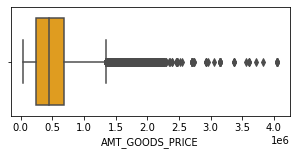

In [51]:
# Checking for the outliers
plt.figure(figsize=(5,2))
sns.boxplot(app_data.AMT_GOODS_PRICE, color="Orange")
plt.show()

**This data column has outliers, so we can impute the NaN values with median**

In [52]:
# Filling Missing values with median of the column since it is a continuous data variable
app_data.AMT_GOODS_PRICE.fillna(app_data.AMT_GOODS_PRICE.median(),inplace=True)

In [53]:
# Checking for any NaN in the column
app_data.AMT_GOODS_PRICE.isnull().sum()

0

In [54]:
# Checking quatiles of the column to deal with outliers
app_data.AMT_GOODS_PRICE.quantile([0,0.2,0.4,0.6,0.8,1.0])

0.0      40500.0
0.2     225000.0
0.4     378000.0
0.6     522000.0
0.8     814500.0
1.0    4050000.0
Name: AMT_GOODS_PRICE, dtype: float64

In [55]:
# Creating a new dataframe with labels as per the quantiles which will be simpler to do analysis
app_data["AMOUNT_GOODSPRICE"] = pd.qcut(app_data.AMT_GOODS_PRICE,q=[0,0.2,0.4,0.6,0.8,1.0],labels=["Very Low","Low","Medium","High","Very High"])

In [56]:
app_data.head(1)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMOUNT_GOODSPRICE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,Low


### AMT_ANNUITY Column
**This column captures the Loan Annuity**

In [57]:
# Checking the column
app_data.AMT_ANNUITY.describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

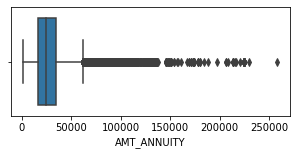

In [58]:
# Checking for the outliers
plt.figure(figsize=(5,2))
sns.boxplot(app_data.AMT_ANNUITY)
plt.show()

**Clearly the data column has outliers**

In [59]:
# Since the missing values are very miniscule in count, we can either remove it or we can replace the data with median value
app_data.AMT_ANNUITY.fillna(app_data.AMT_ANNUITY.median(),inplace=True)

In [60]:
app_data.AMT_ANNUITY.isnull().sum()

0

In [61]:
app_data.AMT_ANNUITY.quantile([0,0.2,0.4,0.6,0.8,1.0])

0.0      1615.5
0.2     14701.5
0.4     21870.0
0.6     28062.0
0.8     37516.5
1.0    258025.5
Name: AMT_ANNUITY, dtype: float64

In [62]:
# Creating a new dataframe with labels as per the quantiles which will be simpler to do analysis
app_data["AMOUNT_ANNUITY"] = pd.qcut(app_data.AMT_ANNUITY,q=[0,0.2,0.4,0.6,0.8,1.0],labels=["Very Low","Low","Medium","High","Very High",])

### CNT_FAM_MEMBERS column
**This is column captures the data of no.of family members of the client**

In [63]:
# Since only two record of the column is having NaN, checking those datapoints
app_data[app_data.CNT_FAM_MEMBERS.isnull()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMOUNT_GOODSPRICE,AMOUNT_ANNUITY
41982,148605,0,Revolving loans,M,N,Y,0,450000.0,675000.0,33750.0,450000.0,Unaccompanied,Commercial associate,Lower secondary,Unknown,Municipal apartment,0.015221,-12396,-1161,-3265.0,-4489,1,1,1,1,1,0,Managers,NaN,2,2,THURSDAY,15,0,1,1,0,1,1,Insurance,0.700618,0.510853,3.0,0.0,3.0,0.0,-876.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,Medium,High
187348,317181,0,Revolving loans,F,N,Y,0,202500.0,585000.0,29250.0,450000.0,Unaccompanied,Commercial associate,Higher education,Unknown,House / apartment,0.031329,-12844,-232,-1597.0,-1571,1,1,0,1,0,0,Accountants,NaN,2,2,FRIDAY,14,0,0,0,0,0,0,Business Entity Type 2,0.645168,0.670652,1.0,0.0,1.0,0.0,-654.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,Medium,High


In [64]:
# Checking the median of the column
app_data.CNT_FAM_MEMBERS.median()

2.0

In [65]:
# As only two record have NaN values in this column, we can either delete the rows or we can replace the missing values with Median, it being a numeric column
# Replacing the NaN values with median
app_data.CNT_FAM_MEMBERS.fillna(app_data.CNT_FAM_MEMBERS.median(),inplace=True)

In [66]:
# Checking whether the above code has made the correct changes
app_data.iloc[[41982,187348]]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMOUNT_GOODSPRICE,AMOUNT_ANNUITY
41982,148605,0,Revolving loans,M,N,Y,0,450000.0,675000.0,33750.0,450000.0,Unaccompanied,Commercial associate,Lower secondary,Unknown,Municipal apartment,0.015221,-12396,-1161,-3265.0,-4489,1,1,1,1,1,0,Managers,2.0,2,2,THURSDAY,15,0,1,1,0,1,1,Insurance,0.700618,0.510853,3.0,0.0,3.0,0.0,-876.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,Medium,High
187348,317181,0,Revolving loans,F,N,Y,0,202500.0,585000.0,29250.0,450000.0,Unaccompanied,Commercial associate,Higher education,Unknown,House / apartment,0.031329,-12844,-232,-1597.0,-1571,1,1,0,1,0,0,Accountants,2.0,2,2,FRIDAY,14,0,0,0,0,0,0,Business Entity Type 2,0.645168,0.670652,1.0,0.0,1.0,0.0,-654.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,Medium,High


In [67]:
#Converting Family Members data type to integer from float as No of family members can not be in decimals
app_data.CNT_FAM_MEMBERS = app_data.CNT_FAM_MEMBERS.astype(int)

In [68]:
# Confirming to check the data type of the column after assigning it to int 
app_data.CNT_FAM_MEMBERS.unique()

array([ 1,  2,  3,  4,  5,  6,  9,  7,  8, 10, 13, 14, 12, 20, 15, 16, 11])

### DAYS_LAST_PHONE_CHANGE column

**This column captures the data of days since last phone number was changed before the customer applied for the loan**

In [69]:
# Checking the null values for the column
app_data[app_data.DAYS_LAST_PHONE_CHANGE.isnull()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMOUNT_GOODSPRICE,AMOUNT_ANNUITY
15709,118330,0,Cash loans,M,Y,Y,0,126000.0,278613.0,25911.0,252000.0,Unaccompanied,Working,Incomplete higher,Married,House / apartment,0.010643,-8574,-293,-4790.0,-1075,0,1,0,1,0,0,Not Known,2,2,2,FRIDAY,13,0,0,0,0,0,0,Trade: type 3,0.565961,0.510853,0.0,0.0,0.0,0.0,NaN,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,Low,Medium


In [70]:
# Replacing null value with median
app_data.DAYS_LAST_PHONE_CHANGE.fillna(app_data.DAYS_LAST_PHONE_CHANGE.median(),inplace=True)

In [71]:
# Checking whether the changes to the null value made
app_data.iloc[[15709]]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMOUNT_GOODSPRICE,AMOUNT_ANNUITY
15709,118330,0,Cash loans,M,Y,Y,0,126000.0,278613.0,25911.0,252000.0,Unaccompanied,Working,Incomplete higher,Married,House / apartment,0.010643,-8574,-293,-4790.0,-1075,0,1,0,1,0,0,Not Known,2,2,2,FRIDAY,13,0,0,0,0,0,0,Trade: type 3,0.565961,0.510853,0.0,0.0,0.0,0.0,-757.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,Low,Medium


In [72]:
# Changing data type of the column from float to int
app_data.DAYS_LAST_PHONE_CHANGE = app_data.DAYS_LAST_PHONE_CHANGE.astype(int)

In [73]:
# Confirming that all the null values has been dealt with
app_data.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RAT

### Dealing with Negative values

In [74]:
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMOUNT_GOODSPRICE,AMOUNT_ANNUITY
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,Low,Medium
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.510853,1.0,0.0,1.0,0.0,-828,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Very High,High
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Very Low,Very Low
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.510853,2.0,0.0,2.0,0.0,-617,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,Low,High
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.510853,0.0,0.0,0.0,0.0,-1106,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Medium,Low


### DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, DAYS_LAST_PHONE_CHANGE columns

**It has been seen that these columns have negative values as the days calculated are in reverse i.e from the day of application. For analysis purpose, we need to change the data to absolute values and also adding a column of AGE by imputing the DAYS_BIRTH column**

In [75]:
app_data.DAYS_BIRTH.describe()

count    307511.000000
mean     -16036.995067
std        4363.988632
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

In [76]:
# Changing negative values to absolute values
# Adding Age column for better analysis
app_data.DAYS_BIRTH = abs(app_data.DAYS_BIRTH)
app_data["AGE"] = round(app_data.DAYS_BIRTH/365)

In [77]:
# Checking whether the Column "AGE" is created
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMOUNT_GOODSPRICE,AMOUNT_ANNUITY,AGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,Low,Medium,26.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.510853,1.0,0.0,1.0,0.0,-828,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Very High,High,46.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Very Low,Very Low,52.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.510853,2.0,0.0,2.0,0.0,-617,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,Low,High,52.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.510853,0.0,0.0,0.0,0.0,-1106,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Medium,Low,55.0


In [78]:
#Creating a separate dataframe with AGE_GROUP
app_data["AGE_GROUP"] = pd.cut(app_data.AGE,[0,30,40,50,60,100], labels=["<30","30-40","40-50","50-60","60+"] )

In [79]:
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMOUNT_GOODSPRICE,AMOUNT_ANNUITY,AGE,AGE_GROUP
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,Low,Medium,26.0,<30
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.510853,1.0,0.0,1.0,0.0,-828,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Very High,High,46.0,40-50
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Very Low,Very Low,52.0,50-60
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.510853,2.0,0.0,2.0,0.0,-617,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,Low,High,52.0,50-60
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.510853,0.0,0.0,0.0,0.0,-1106,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Medium,Low,55.0,50-60


In [80]:
app_data.DAYS_EMPLOYED.describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [81]:
# Changing negative values to absolute values
app_data.DAYS_EMPLOYED = abs(app_data.DAYS_EMPLOYED)

In [82]:
app_data.DAYS_REGISTRATION.describe()

count    307511.000000
mean      -4986.120328
std        3522.886321
min      -24672.000000
25%       -7479.500000
50%       -4504.000000
75%       -2010.000000
max           0.000000
Name: DAYS_REGISTRATION, dtype: float64

In [83]:
# Changing negative values to absolute values
app_data.DAYS_REGISTRATION = abs(app_data.DAYS_REGISTRATION)

In [84]:
app_data.DAYS_ID_PUBLISH.describe()

count    307511.000000
mean      -2994.202373
std        1509.450419
min       -7197.000000
25%       -4299.000000
50%       -3254.000000
75%       -1720.000000
max           0.000000
Name: DAYS_ID_PUBLISH, dtype: float64

In [85]:
# Changing negative values to absolute values
app_data.DAYS_ID_PUBLISH = abs(app_data.DAYS_ID_PUBLISH)

In [86]:
app_data.DAYS_LAST_PHONE_CHANGE.describe()

count    307511.000000
mean       -962.858119
std         826.807226
min       -4292.000000
25%       -1570.000000
50%        -757.000000
75%        -274.000000
max           0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

In [87]:
# Changing negative values to absolute values
app_data.DAYS_LAST_PHONE_CHANGE = abs(app_data.DAYS_LAST_PHONE_CHANGE)

In [88]:
# Checking if the negative values has been converted
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMOUNT_GOODSPRICE,AMOUNT_ANNUITY,AGE,AGE_GROUP
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,Low,Medium,26.0,<30
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.510853,1.0,0.0,1.0,0.0,828,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Very High,High,46.0,40-50
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,1,1,1,1,1,0,Laborers,1,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,815,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Very Low,Very Low,52.0,50-60
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,1,1,0,1,0,0,Laborers,2,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.510853,2.0,0.0,2.0,0.0,617,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,Low,High,52.0,50-60
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,1,1,0,1,0,0,Core staff,1,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.510853,0.0,0.0,0.0,0.0,1106,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Medium,Low,55.0,50-60


# Treating Outliers and any other anamolies in the dataset

In [89]:
# Getting list of columns which have dtype = object. We can check these categorical columns for any anamolies by reviewing their unique categories
list(set(app_data.columns) - set(app_data.describe()))

['FLAG_OWN_REALTY',
 'NAME_HOUSING_TYPE',
 'ORGANIZATION_TYPE',
 'NAME_EDUCATION_TYPE',
 'CODE_GENDER',
 'NAME_FAMILY_STATUS',
 'WEEKDAY_APPR_PROCESS_START',
 'OCCUPATION_TYPE',
 'AGE_GROUP',
 'NAME_CONTRACT_TYPE',
 'FLAG_OWN_CAR',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'AMOUNT_ANNUITY',
 'AMOUNT_GOODSPRICE']

In [90]:
app_data.NAME_HOUSING_TYPE.unique() # Seems no anamolies

array(['House / apartment', 'Rented apartment', 'With parents',
       'Municipal apartment', 'Office apartment', 'Co-op apartment'],
      dtype=object)

In [91]:
app_data.NAME_INCOME_TYPE.unique() #There is one category of Maternity leave which can not be a Income Type.

array(['Working', 'State servant', 'Commercial associate', 'Pensioner',
       'Unemployed', 'Student', 'Businessman', 'Maternity leave'],
      dtype=object)

In [92]:
#Checking value counts of Income Types
app_data.NAME_INCOME_TYPE.value_counts() # Only 5 records have Maternity leave as category, we can put these records in Working as it is the largest category 

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

In [93]:
app_data.NAME_INCOME_TYPE.replace(["Maternity leave"],"Working", inplace=True)

In [94]:
# Confirming the replacement
app_data.NAME_INCOME_TYPE.value_counts() # The 5 records has been updated to Working

Working                 158779
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Name: NAME_INCOME_TYPE, dtype: int64

In [95]:
app_data.WEEKDAY_APPR_PROCESS_START.unique()# The weekdays are correct

array(['WEDNESDAY', 'MONDAY', 'THURSDAY', 'SUNDAY', 'SATURDAY', 'FRIDAY',
       'TUESDAY'], dtype=object)

In [96]:
app_data.NAME_TYPE_SUITE.unique() # Seems good

array(['Unaccompanied', 'Family', 'Spouse, partner', 'Children',
       'Other_A', 'Other_B', 'Group of people'], dtype=object)

In [97]:
app_data.NAME_FAMILY_STATUS.unique() # Seems good

array(['Single / not married', 'Married', 'Civil marriage', 'Widow',
       'Separated', 'Unknown'], dtype=object)

In [98]:
# Checking unique variables in CODE_GENDER column
app_data.CODE_GENDER.unique()

array(['M', 'F', 'XNA'], dtype=object)

In [99]:
app_data.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [100]:
#As only 4 records have XNA variable, we can replace it with its Mode, i.e F
app_data.CODE_GENDER.replace(["XNA"],app_data.CODE_GENDER.mode(),inplace=True)

In [101]:
#Confirmin if the replacement has been done
app_data.CODE_GENDER.value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [102]:
app_data.OCCUPATION_TYPE.unique() # Seems good

array(['Laborers', 'Core staff', 'Accountants', 'Managers', 'Not Known',
       'Drivers', 'Sales staff', 'Cleaning staff', 'Cooking staff',
       'Private service staff', 'Medicine staff', 'Security staff',
       'High skill tech staff', 'Waiters/barmen staff',
       'Low-skill Laborers', 'Realty agents', 'Secretaries', 'IT staff',
       'HR staff'], dtype=object)

In [103]:
app_data.ORGANIZATION_TYPE.unique()# Seems there is a category of XNA which needs to be dealt with

array(['Business Entity Type 3', 'School', 'Government', 'Religion',
       'Other', 'XNA', 'Electricity', 'Medicine',
       'Business Entity Type 2', 'Self-employed', 'Transport: type 2',
       'Construction', 'Housing', 'Kindergarten', 'Trade: type 7',
       'Industry: type 11', 'Military', 'Services', 'Security Ministries',
       'Transport: type 4', 'Industry: type 1', 'Emergency', 'Security',
       'Trade: type 2', 'University', 'Transport: type 3', 'Police',
       'Business Entity Type 1', 'Postal', 'Industry: type 4',
       'Agriculture', 'Restaurant', 'Culture', 'Hotel',
       'Industry: type 7', 'Trade: type 3', 'Industry: type 3', 'Bank',
       'Industry: type 9', 'Insurance', 'Trade: type 6',
       'Industry: type 2', 'Transport: type 1', 'Industry: type 12',
       'Mobile', 'Trade: type 1', 'Industry: type 5', 'Industry: type 10',
       'Legal Services', 'Advertising', 'Trade: type 5', 'Cleaning',
       'Industry: type 13', 'Trade: type 4', 'Telecom',
       'I

In [104]:
# Checking the percentage of the data in various categories in the data column
app_data.ORGANIZATION_TYPE.value_counts(normalize=True)*100

Business Entity Type 3    22.110429
XNA                       18.007161
Self-employed             12.491260
Other                      5.425172
Medicine                   3.639870
Business Entity Type 2     3.431747
Government                 3.383294
School                     2.891929
Trade: type 7              2.546576
Kindergarten               2.237318
Construction               2.185613
Business Entity Type 1     1.945947
Transport: type 4          1.755384
Trade: type 3              1.135569
Industry: type 9           1.095245
Industry: type 3           1.065978
Security                   1.055897
Housing                    0.961917
Industry: type 11          0.879318
Military                   0.856555
Bank                       0.815255
Agriculture                0.798020
Police                     0.761274
Transport: type 2          0.716722
Postal                     0.701438
Security Ministries        0.641928
Trade: type 2              0.617864
Restaurant                 0

#### As over 18% of records are being marked XNA in ORGANIZATION_TYPE column, we can drop off the rows. But since we are not required to delete the records, we can either move this records by adding it to its mode value category or rename XNA as Unknown for better understanding. Adding the data to mode value category can influence the analysis due to its proportion, hence renaming XNA to Unknown

In [105]:
app_data.ORGANIZATION_TYPE.replace(["XNA"],"Unknown",inplace=True)

In [106]:
# Confirming the change
app_data.ORGANIZATION_TYPE.value_counts(normalize=True)*100

Business Entity Type 3    22.110429
Unknown                   18.007161
Self-employed             12.491260
Other                      5.425172
Medicine                   3.639870
Business Entity Type 2     3.431747
Government                 3.383294
School                     2.891929
Trade: type 7              2.546576
Kindergarten               2.237318
Construction               2.185613
Business Entity Type 1     1.945947
Transport: type 4          1.755384
Trade: type 3              1.135569
Industry: type 9           1.095245
Industry: type 3           1.065978
Security                   1.055897
Housing                    0.961917
Industry: type 11          0.879318
Military                   0.856555
Bank                       0.815255
Agriculture                0.798020
Police                     0.761274
Transport: type 2          0.716722
Postal                     0.701438
Security Ministries        0.641928
Trade: type 2              0.617864
Restaurant                 0

In [107]:
app_data.FLAG_OWN_REALTY.unique() # Seems good

array(['Y', 'N'], dtype=object)

In [108]:
app_data.NAME_EDUCATION_TYPE.unique()# Seems good

array(['Secondary / secondary special', 'Higher education',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype=object)

In [109]:
app_data.FLAG_OWN_CAR.unique()# Seems good

array(['N', 'Y'], dtype=object)

In [110]:
app_data.NAME_CONTRACT_TYPE.unique()# Seems good

array(['Cash loans', 'Revolving loans'], dtype=object)

### AMT_INCOME_TOTAL column

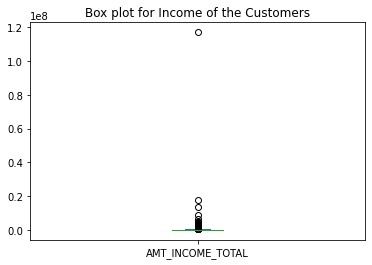

In [111]:
# Checking for outliers
app_data.AMT_INCOME_TOTAL.plot.box()
plt.title("Box plot for Income of the Customers")
plt.show()

In [112]:
# Checking for the Quantile values of the data column
app_data.AMT_INCOME_TOTAL.quantile([0,0.2,0.4,0.6,0.8,1.0])

0.0        25650.0
0.2        99000.0
0.4       135000.0
0.6       162000.0
0.8       225000.0
1.0    117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [113]:
# Creating a Categorical datafrom of Customer Income for better analysis and deal with Outliers
app_data["CUST_INCOME"] = pd.qcut(app_data.AMT_INCOME_TOTAL,q=[0,0.2,0.4,0.6,0.8,1.0],labels=["Very Low","Low","Medium","High","Very High"])

In [114]:
app_data.head(1)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMOUNT_GOODSPRICE,AMOUNT_ANNUITY,AGE,AGE_GROUP,CUST_INCOME
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,Low,Medium,26.0,<30,High


### AMT_CREDIT column

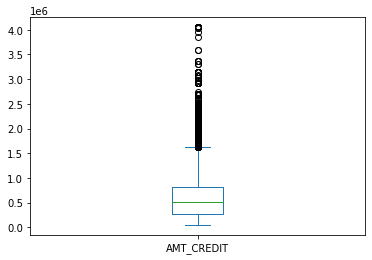

In [115]:
# Checking for Outliers
app_data.AMT_CREDIT.plot.box()
plt.show()

In [116]:
# Checking Quantile values for the Loan Amount
app_data.AMT_CREDIT.quantile([0,0.2,0.4,0.6,0.8,1.0])

0.0      45000.0
0.2     254700.0
0.4     432000.0
0.6     604152.0
0.8     900000.0
1.0    4050000.0
Name: AMT_CREDIT, dtype: float64

In [117]:
# Creating a Categorical datafrom of Customer Income for better analysis and deal with Outliers
app_data["CUST_INCOME"] = pd.qcut(app_data.AMT_INCOME_TOTAL,q=[0,0.2,0.4,0.6,0.8,1.0],labels=["Very Low","Low","Medium","High","Very High"])

In [118]:
app_data.head(1)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMOUNT_GOODSPRICE,AMOUNT_ANNUITY,AGE,AGE_GROUP,CUST_INCOME
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,Low,Medium,26.0,<30,High


### AMT_CREDIT columns

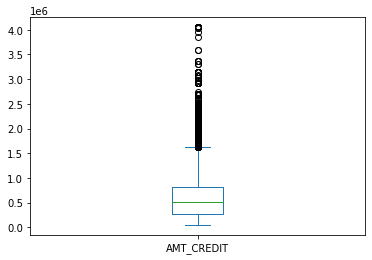

In [119]:
# Plotting Boxplot for the data column to check outlier
app_data.AMT_CREDIT.plot.box()
plt.show()

In [120]:
# Clearly the data column has outliers, we can deal with it by creating a new categorical column which will make the analysing more simpler
app_data["LOAN_AMT"] = pd.qcut(app_data.AMT_CREDIT,q=[0,0.2,0.4,0.6,0.8,1.0],labels=["Very Low","Low","Medium","High","Very High"])

In [121]:
app_data.head(1)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMOUNT_GOODSPRICE,AMOUNT_ANNUITY,AGE,AGE_GROUP,CUST_INCOME,LOAN_AMT
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,Low,Medium,26.0,<30,High,Low


# Data Analysis for Application Data

**Now that we have clean the data, dealt with NaN values and Outliers, we can start the analysis of the Application Data**

In [122]:
# Checking the data imbalance of the Target Column
app_data.TARGET.value_counts(normalize=True)*100

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

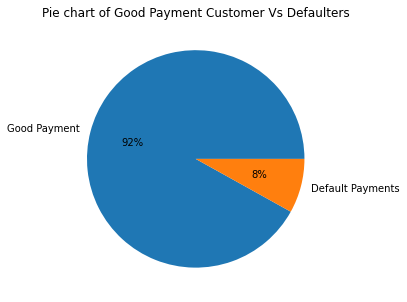

In [123]:
plt.figure(figsize=(10,5))
plt.pie(app_data.TARGET.value_counts(normalize=True)*100,labels = ["Good Payment", "Default Payments"],autopct='%.f%%')
plt.title("Pie chart of Good Payment Customer Vs Defaulters")
plt.show()

**So, only 8% of the Target customers have the payment related issue, rest have been 92% are regular in their dues**

In [124]:
# To make analysis more simple, we can create two dataframes; one with payment difficulties and other wiht no difficulty.
appdata_payment_issue = app_data[app_data.TARGET==1] # Dataframe for defaulters
appdata_good_payment = app_data[app_data.TARGET==0] # Dataframe for no payment issue

In [125]:
# Checking whether the data has been separted proportionately in the two dataframes
print("Customers with Payment Defaults (in %) - ",(appdata_payment_issue.value_counts().sum()/app_data.value_counts().sum())*100)
print("Customers with good payments (in %) - ",(appdata_good_payment.value_counts().sum()/app_data.value_counts().sum())*100)

Customers with Payment Defaults (in %) -  8.072881945686495
Customers with good payments (in %) -  91.92711805431351


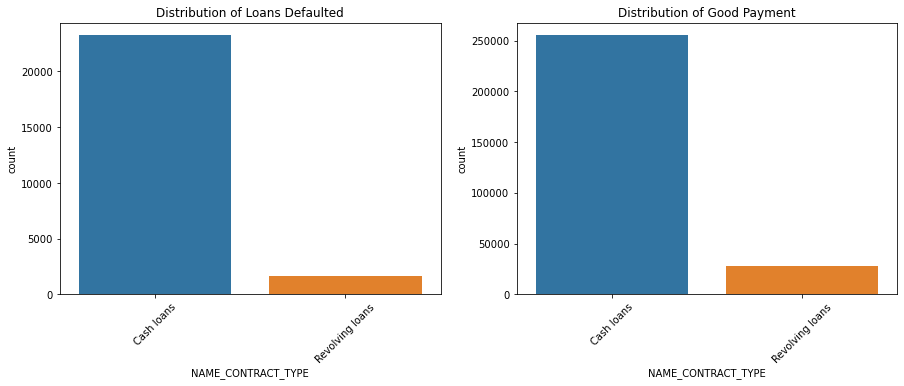

In [126]:
# Lets analyse whether type of loans has any relation to the payments of the loans
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(x="NAME_CONTRACT_TYPE", data=appdata_payment_issue)
plt.title("Distribution of Loans Defaulted")
plt.xticks(rotation=45)

plt.subplot(1,2,2)
sns.countplot(x="NAME_CONTRACT_TYPE", data=appdata_good_payment)
plt.title("Distribution of Good Payment")
plt.xticks(rotation=45)

plt.show()

**It can be observed that the Cash Loans which have fixed term and payment are mostly defaulted. Also from both the plots we can infer that Cash Loans are more preferred by banks than revolving (credit limit) loans**

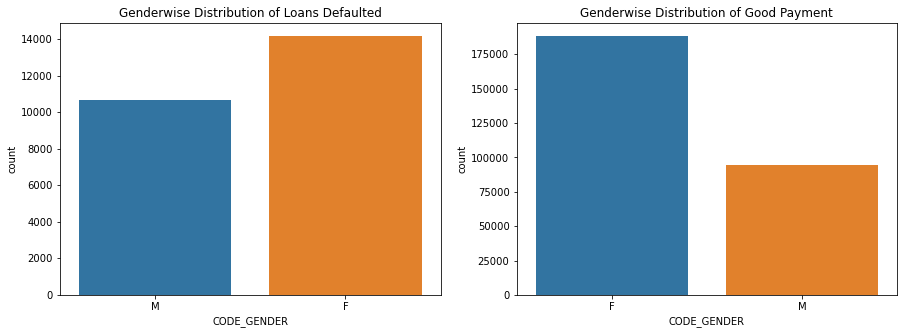

In [127]:
# Analysing whether Gender has any relation with the defaults in payments
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(x="CODE_GENDER", data=appdata_payment_issue)
plt.title("Genderwise Distribution of Loans Defaulted")

plt.subplot(1,2,2)
sns.countplot(x="CODE_GENDER", data=appdata_good_payment)
plt.title("Genderwise Distribution of Good Payment")

plt.show()

**It can observed that Female gender is more prone to default the payments but this scenario can be because the loans are been given to more number of females as compared to males**

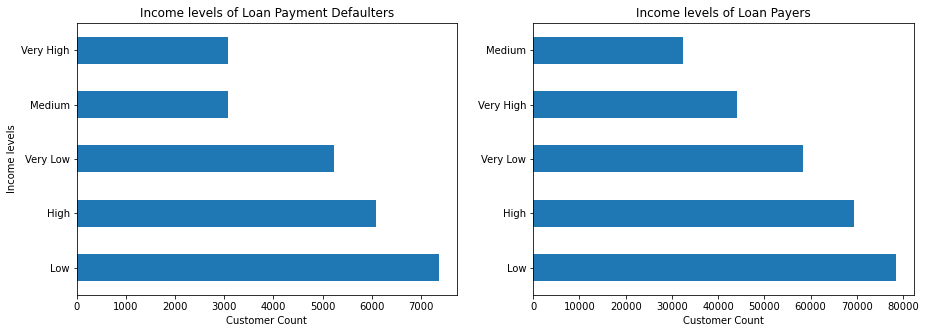

In [128]:
# Bar plot to understand Payment defaulter's and the Total Income
plt.figure(figsize= (15,5))
plt.subplot(1,2,1)
appdata_payment_issue.CUST_INCOME.value_counts().plot.barh()
plt.title("Income levels of Loan Payment Defaulters")
plt.xlabel("Customer Count")
plt.ylabel("Income levels")

plt.subplot(1,2,2)
appdata_good_payment.CUST_INCOME.value_counts().plot.barh()
plt.title("Income levels of Loan Payers")
plt.xlabel("Customer Count")


plt.show()

**We can observe that Very Low, Low and High level of Income Customers are major defaulters. It is quite understandable that Low levels of Income can be a reason for defaults, but we need to dig deeper to understand the reason behind payment defaults by High Income Customers**

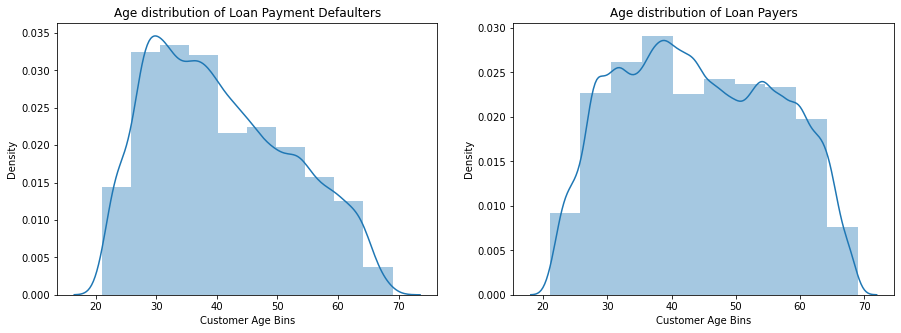

In [129]:
# Dist plot to understand Payment defaulter's and their Age
plt.figure(figsize= (15,5))
plt.subplot(1,2,1)
sns.distplot(appdata_payment_issue.AGE,bins=10)
plt.title("Age distribution of Loan Payment Defaulters")
plt.xlabel("Customer Age Bins")


plt.subplot(1,2,2)
sns.distplot(appdata_good_payment.AGE,bins=10)
plt.title("Age distribution of Loan Payers")
plt.xlabel("Customer Age Bins")

plt.show()

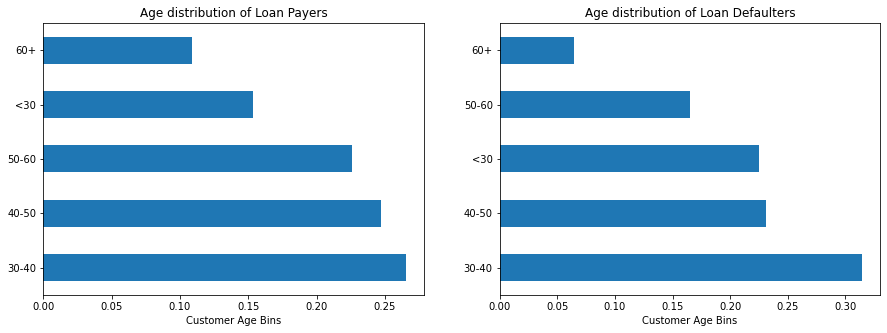

In [130]:
# Dist plot to understand Payment defaulter's and their Age GROUP
plt.figure(figsize= (15,5))
plt.subplot(1,2,1)

appdata_good_payment.AGE_GROUP.value_counts(normalize=True).plot.barh()
plt.title("Age distribution of Loan Payers")
plt.xlabel("Customer Age Bins")


plt.subplot(1,2,2)
appdata_payment_issue.AGE_GROUP.value_counts(normalize=True).plot.barh()
plt.title("Age distribution of Loan Defaulters")
plt.xlabel("Customer Age Bins")

plt.show()

**It can be observed from the distplot that age group of 30-50 are the mostly the defaulters. But with customers who pay loan on this age distribution is well proportioned**

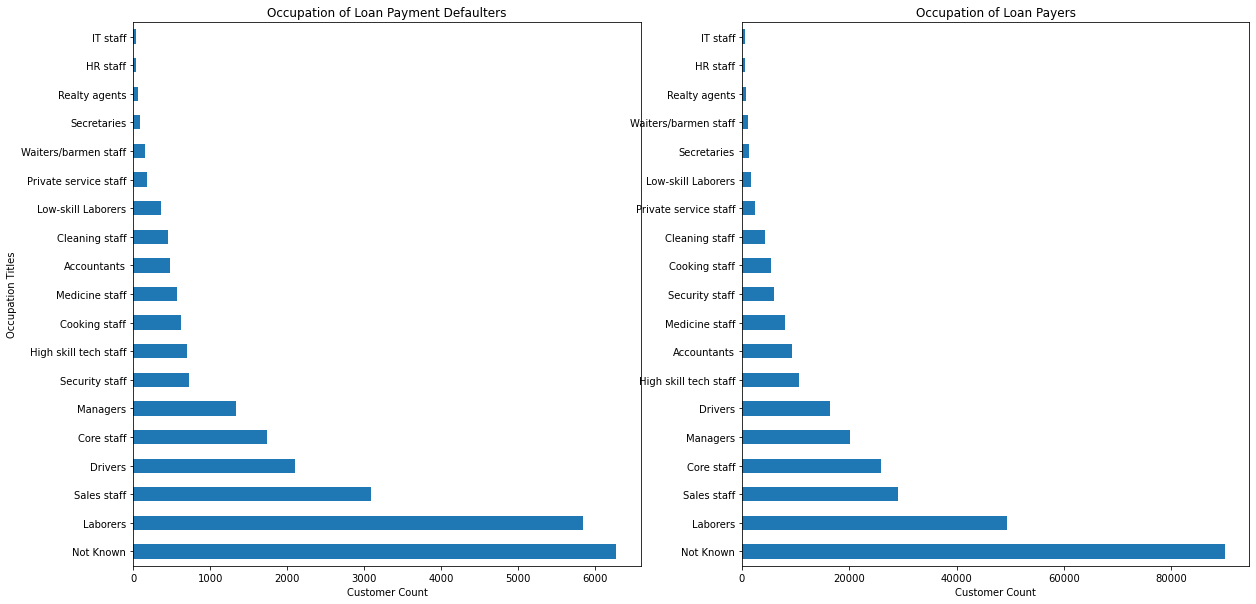

In [131]:
# Bar plot to understand Payment defaulter's and the Occupation
plt.figure(figsize= (20,10))
plt.subplot(1,2,1)
appdata_payment_issue.OCCUPATION_TYPE.value_counts().plot.barh()
plt.title("Occupation of Loan Payment Defaulters")
plt.xlabel("Customer Count")
plt.ylabel("Occupation Titles")

plt.subplot(1,2,2)
appdata_good_payment.OCCUPATION_TYPE.value_counts().plot.barh()
plt.title("Occupation of Loan Payers")
plt.xlabel("Customer Count")
plt.show()

**We can observe that Laborers, Sales Staff, Drivers mostly the Very Low and Low Income people are major defaulters. But if we look at the Customers with no defaults, the same category of the Occupation Type customers are also major on time payers**

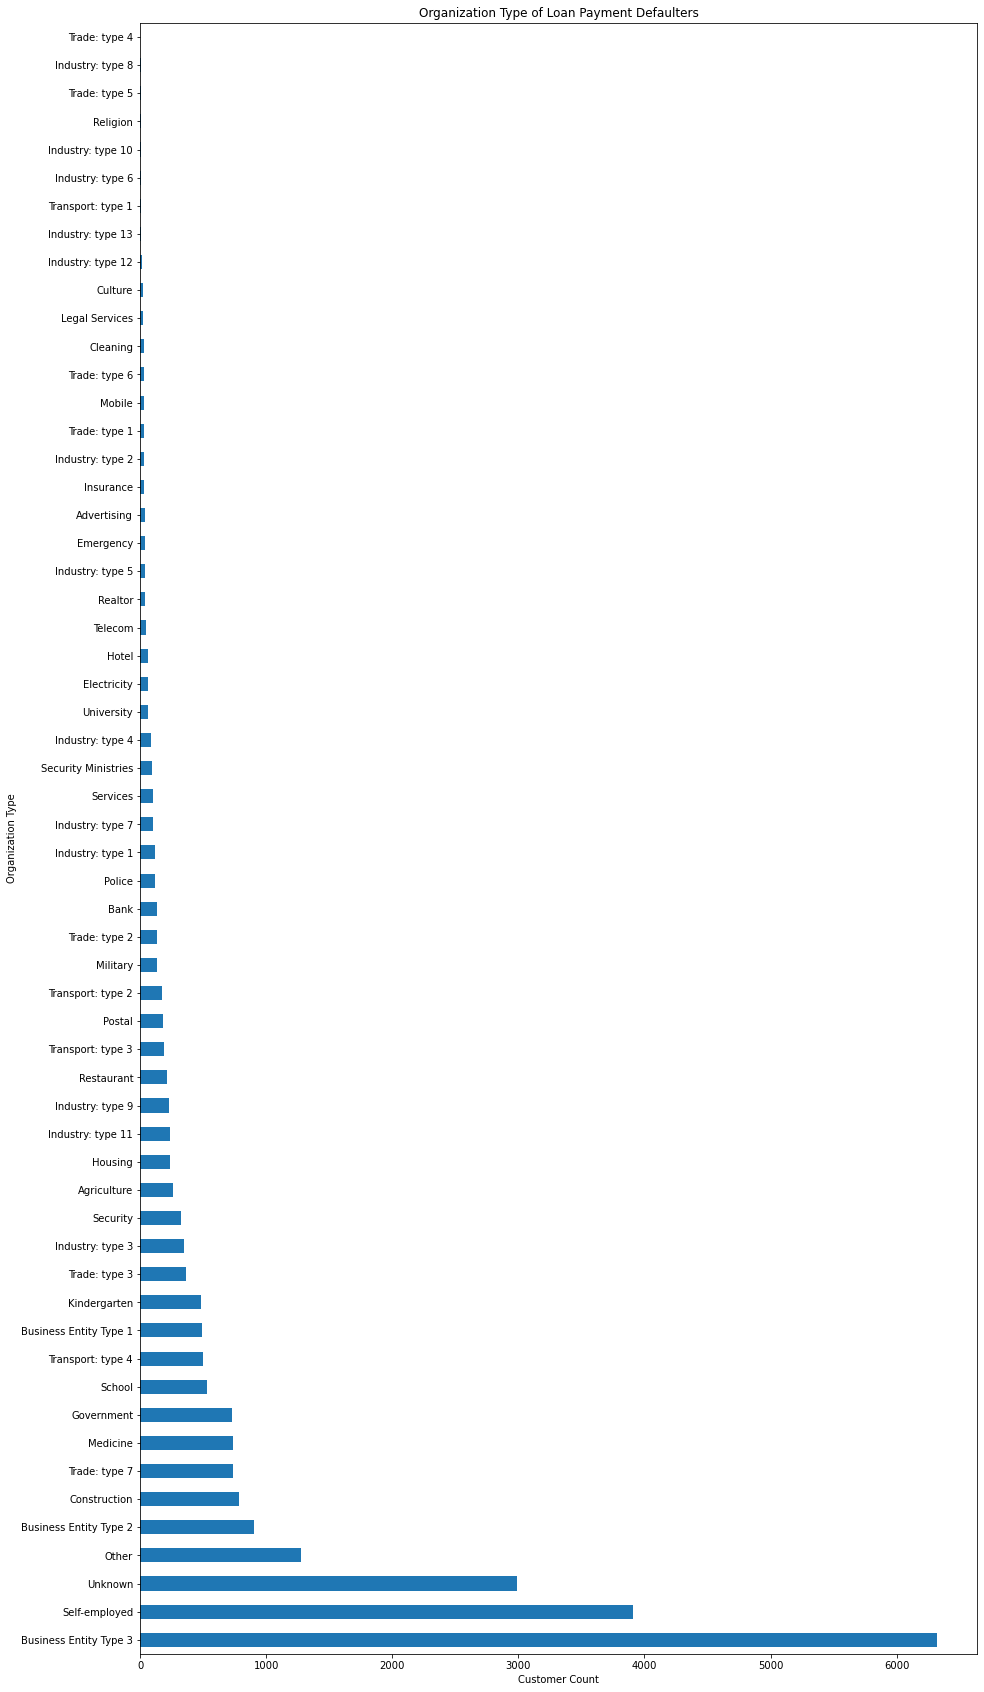

In [132]:
# Bar plot to understand Payment defaulter's and the Organization
plt.figure(figsize= (15,30))
appdata_payment_issue.ORGANIZATION_TYPE.value_counts().plot.barh()
plt.title("Organization Type of Loan Payment Defaulters")
plt.xlabel("Customer Count")
plt.ylabel("Organization Type")
plt.show()

**We can infer that Business Entity Type - 3, Self Employed are major defaulters**

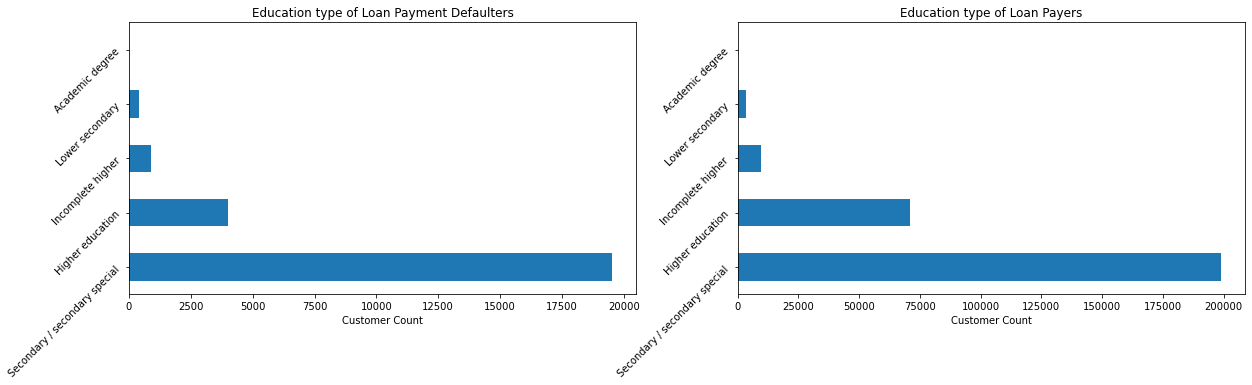

In [331]:
# Lets check whether what Education levels are more defaulters
# Bar plot to understand Payment defaulter's and the Education Type
plt.figure(figsize= (20,5))
plt.subplot(1,2,1)
appdata_payment_issue.NAME_EDUCATION_TYPE.value_counts().plot.barh()
plt.title("Education type of Loan Payment Defaulters")
plt.xlabel("Customer Count")

plt.yticks(rotation=45)

plt.subplot(1,2,2)
appdata_good_payment.NAME_EDUCATION_TYPE.value_counts().plot.barh()
plt.title("Education type of Loan Payers")
plt.xlabel("Customer Count")
plt.yticks(rotation=45)

plt.show()

**We can infer that maximum defaulters are with secondary level education**

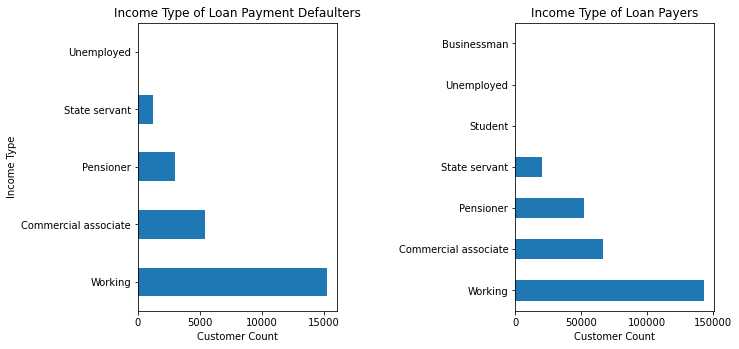

In [134]:
# Bar plot to understand Payment defaulter's and the Income Type
plt.figure(figsize= (10,5))
plt.subplot(1,2,1)
appdata_payment_issue.NAME_INCOME_TYPE.value_counts().plot.barh()
plt.title("Income Type of Loan Payment Defaulters")
plt.xlabel("Customer Count")
plt.ylabel("Income Type")

plt.subplot(1,2,2)
appdata_good_payment.NAME_INCOME_TYPE.value_counts().plot.barh()
plt.title("Income Type of Loan Payers")
plt.xlabel("Customer Count")

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.9, 
                    hspace=0.4)

plt.show()

**It is a strange result that Working customers are mostly the defaulters. We need to further dig into this aspect to understand why a stable income customer is defaulter as against unemployed or Pensioners, who have low income/no income and yet are less in defaults**

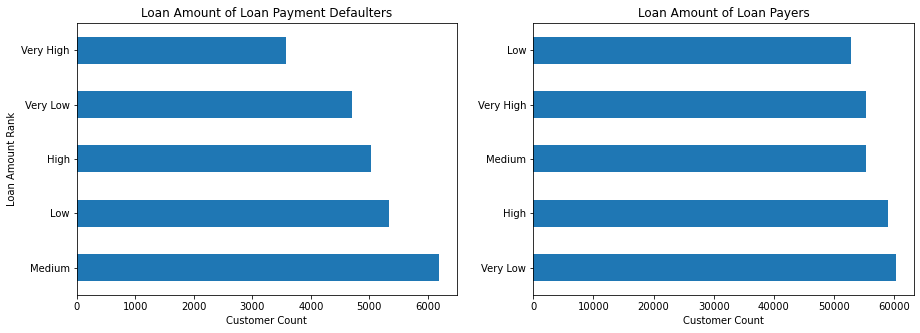

In [135]:
# Let's check the which Loan Amount category are majorly defaulted
plt.figure(figsize= (15,5))
plt.subplot(1,2,1)
appdata_payment_issue.LOAN_AMT.value_counts().plot.barh()
plt.title("Loan Amount of Loan Payment Defaulters")
plt.xlabel("Customer Count")
plt.ylabel("Loan Amount Rank")

plt.subplot(1,2,2)
appdata_good_payment.LOAN_AMT.value_counts().plot.barh()
plt.title("Loan Amount of Loan Payers")
plt.xlabel("Customer Count")

plt.show()

**It can be observed that the customers with Medium and Low Loan Amount have defaulted more. Looking at the same scenario of Loan Payers, the loan of all the types are paid consistently**

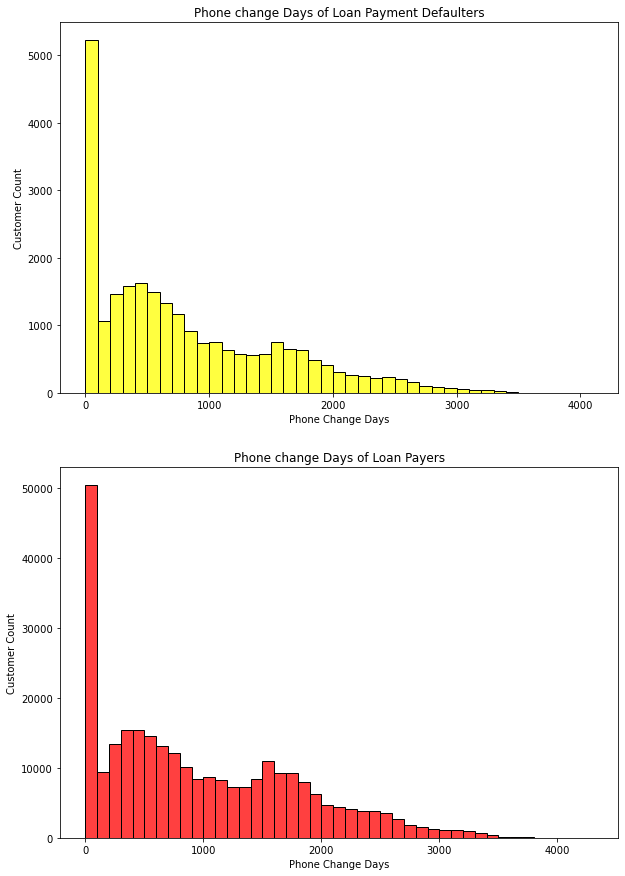

In [136]:
# Checking whether the defaulters do change their Phone Numbers
plt.figure(figsize= (10,15))
plt.subplot(2,1,1)
sns.histplot(x="DAYS_LAST_PHONE_CHANGE", data = appdata_payment_issue,binwidth=100,color="Yellow")
plt.title("Phone change Days of Loan Payment Defaulters")
plt.xlabel("Phone Change Days")
plt.ylabel("Customer Count")

plt.subplot(2,1,2)
sns.histplot(x="DAYS_LAST_PHONE_CHANGE", data = appdata_good_payment,binwidth=100,color="Red")
plt.title("Phone change Days of Loan Payers")
plt.xlabel("Phone Change Days")
plt.ylabel("Customer Count")

plt.show()

**It can be said that the major of the defaulters have changed their Mobile Numbers 100 days prior to Application. But so does the Loan Payers have**

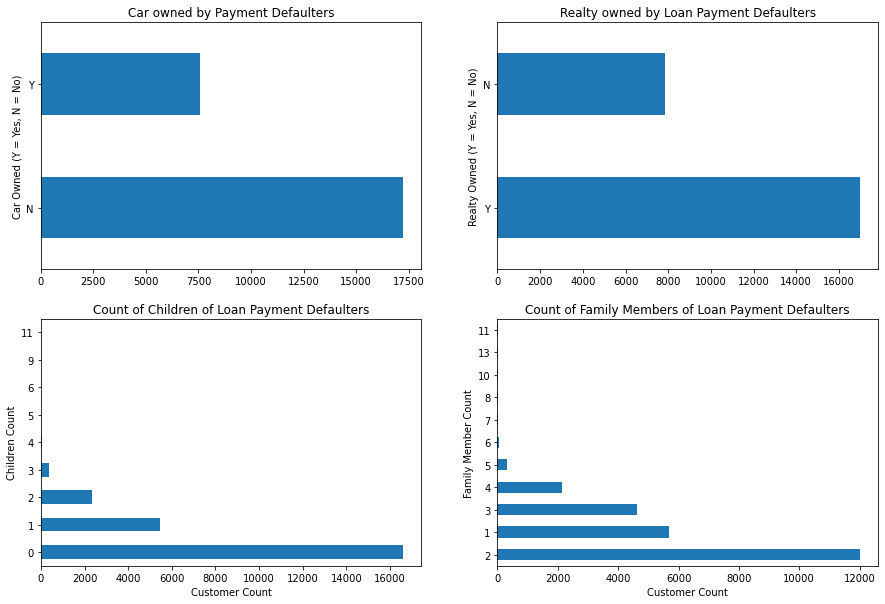

In [137]:
# Checking with Subplots
plt.figure(figsize= (15,10))
plt.subplot(2,2,1)
appdata_payment_issue.FLAG_OWN_CAR.value_counts().plot.barh()
plt.title("Car owned by Payment Defaulters")

plt.ylabel("Car Owned (Y = Yes, N = No)")

plt.subplot(2,2,2)
appdata_payment_issue.FLAG_OWN_REALTY.value_counts().plot.barh()
plt.title("Realty owned by Loan Payment Defaulters")

plt.ylabel("Realty Owned (Y = Yes, N = No)")

plt.subplot(2,2,3)
appdata_payment_issue.CNT_CHILDREN.value_counts().plot.barh()
plt.title("Count of Children of Loan Payment Defaulters")
plt.xlabel("Customer Count")
plt.ylabel("Children Count")

plt.subplot(2,2,4)
appdata_payment_issue.CNT_FAM_MEMBERS.value_counts().plot.barh()
plt.title("Count of Family Members of Loan Payment Defaulters")
plt.xlabel("Customer Count")
plt.ylabel("Family Member Count")

plt.show()

#### We can infer that
1. Most of the defaulters owne realty but not car
2. Most of the defaulters have no children and have only 2 members in the family i.e the family is small
3. This clearly strengthen that since younger age group i.e 27-45 years of customers are defaulters, they are Low Income Customers with lesser no. of family members, belong to lower education levels, and Occupation type. Also most of the loans defaulted is for smaller amounts

# Lets check the Previous Application CSV

In [138]:
# We have already uploaded the csv as pre_data

In [139]:
pre_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [140]:
# Let's check the data file
pre_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [141]:
pre_data.shape

(1670214, 37)

# Dealing with Null Values in the data

In [142]:
# Checking the Null values in percentages in the data
(pre_data.isnull().sum()/len(pre_data)*100).sort_values(ascending=False)

RATE_INTEREST_PRIVILEGED       99.643698
RATE_INTEREST_PRIMARY          99.643698
AMT_DOWN_PAYMENT               53.636480
RATE_DOWN_PAYMENT              53.636480
NAME_TYPE_SUITE                49.119754
NFLAG_INSURED_ON_APPROVAL      40.298129
DAYS_TERMINATION               40.298129
DAYS_LAST_DUE                  40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_FIRST_DUE                 40.298129
DAYS_FIRST_DRAWING             40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
NAME_YIELD_GROUP                0.000000
NAME_PORTFOLIO                  0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
SK_ID_PREV                      0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE

In [143]:
#Assigning columns with more than 40% null values to a separate variable
predata_nullvalues = (pre_data.isnull().sum()/len(pre_data)*100).sort_values(ascending=False)
predata_nullvalmorethan40pct = predata_nullvalues[predata_nullvalues > 40].index

In [144]:
#Checking the shape of the null value variable
predata_nullvalmorethan40pct.shape

(11,)

In [145]:
predata_nullvalmorethan40pct

Index(['RATE_INTEREST_PRIVILEGED', 'RATE_INTEREST_PRIMARY', 'AMT_DOWN_PAYMENT',
       'RATE_DOWN_PAYMENT', 'NAME_TYPE_SUITE', 'NFLAG_INSURED_ON_APPROVAL',
       'DAYS_TERMINATION', 'DAYS_LAST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_FIRST_DUE', 'DAYS_FIRST_DRAWING'],
      dtype='object')

In [146]:
# Droping the columns with more than 40% null values
pre_data.drop(labels=predata_nullvalmorethan40pct,axis=1,inplace=True)

In [147]:
# Checking shape of the dataframe after the dropped columns
pre_data.shape


(1670214, 26)

In [148]:
#Checking remaining Columns with Null Values
pre_data.isnull().sum().sort_values(ascending=False)

AMT_GOODS_PRICE                385515
AMT_ANNUITY                    372235
CNT_PAYMENT                    372230
PRODUCT_COMBINATION               346
AMT_CREDIT                          1
CODE_REJECT_REASON                  0
NAME_YIELD_GROUP                    0
NAME_SELLER_INDUSTRY                0
SELLERPLACE_AREA                    0
CHANNEL_TYPE                        0
NAME_PRODUCT_TYPE                   0
NAME_PORTFOLIO                      0
NAME_GOODS_CATEGORY                 0
NAME_CLIENT_TYPE                    0
SK_ID_PREV                          0
NAME_PAYMENT_TYPE                   0
SK_ID_CURR                          0
NAME_CONTRACT_STATUS                0
NAME_CASH_LOAN_PURPOSE              0
NFLAG_LAST_APPL_IN_DAY              0
FLAG_LAST_APPL_PER_CONTRACT         0
HOUR_APPR_PROCESS_START             0
WEEKDAY_APPR_PROCESS_START          0
AMT_APPLICATION                     0
NAME_CONTRACT_TYPE                  0
DAYS_DECISION                       0
dtype: int64

### AMT_GOODS_PRICE column

In [149]:
pre_data.AMT_GOODS_PRICE.describe()

count    1.284699e+06
mean     2.278473e+05
std      3.153966e+05
min      0.000000e+00
25%      5.084100e+04
50%      1.123200e+05
75%      2.340000e+05
max      6.905160e+06
Name: AMT_GOODS_PRICE, dtype: float64

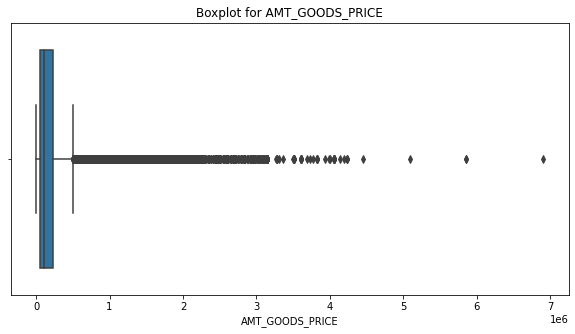

In [150]:
#Ploting the column
plt.figure(figsize= (10,5))
sns.boxplot(x="AMT_GOODS_PRICE",data=pre_data)
plt.title("Boxplot for AMT_GOODS_PRICE")
plt.show()

**We can see that there are Outliers, we can fill the NaN values with median in this case. Also we can create a separate categorical column to avoid skewness in the analysis**

In [151]:
# Fill Null values with median
pre_data.AMT_GOODS_PRICE.fillna(pre_data.AMT_GOODS_PRICE.median(), inplace=True)

In [152]:
# Checking if the column has any null values after the above code
pre_data.AMT_GOODS_PRICE.isnull().sum()

0

In [153]:
# Creating a separate Dataframe
pre_data["AMOUNT_GOODSPRICE"] = pd.qcut(pre_data.AMT_GOODS_PRICE,q=[0,0.2,0.4,0.6,0.8,1.0],labels=["Very Low","Low","Medium","High"],duplicates="drop")

In [154]:
pre_data.head(1)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,AMOUNT_GOODSPRICE
0,2030495,271877,Consumer loans,1730.43,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,Very Low


#### AMT_ANNUITY column

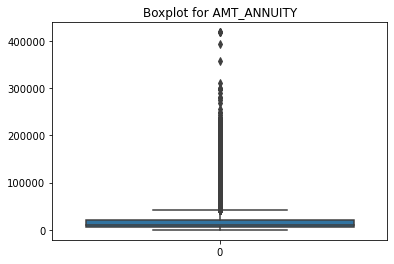

In [155]:
# Checking for Outliers thorugh Boxplot
sns.boxplot(data=pre_data.AMT_ANNUITY)
plt.title("Boxplot for AMT_ANNUITY")
plt.show()

**This column has many outliers, we can replace NaN values with median of the data series and for Outliers, we can create a separate data column with categories**

In [156]:
# Filling the Null values with median value
pre_data.AMT_ANNUITY = pre_data.AMT_ANNUITY.fillna(pre_data.AMT_ANNUITY.median())

In [157]:
# Checking to ensure that there are no null values remaining
pre_data.AMT_ANNUITY.isnull().sum()

0

In [158]:
# Creating a separate categorical column of AMT_ANNUITY
pre_data.AMOUNT_ANNUITY = pd.qcut(pre_data.AMT_ANNUITY,q=[0,0.2,0.4,0.6,0.8,1],labels=["Very Low","Low","Medium","High"],duplicates="drop")

In [159]:
pre_data.head(1)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,AMOUNT_GOODSPRICE
0,2030495,271877,Consumer loans,1730.43,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,Very Low


### CNT_PAYMENT column

In [160]:
#Checking the Null count
pre_data.CNT_PAYMENT.isnull().value_counts(normalize=True)

False    0.777136
True     0.222864
Name: CNT_PAYMENT, dtype: float64

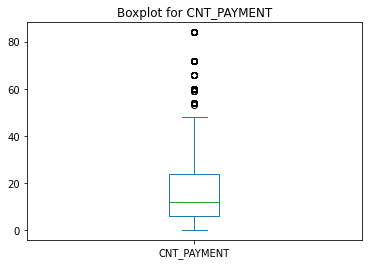

In [161]:
# Checking for Outliers with boxplot
pre_data.CNT_PAYMENT.plot.box()
plt.title("Boxplot for CNT_PAYMENT")
plt.show()


**This data column has outliers so we can safely replace median values with the missing values, also we are going to keep the outliers in this data column as it is**

In [162]:
# Filling null values with median as there are outliers present in the data
pre_data.CNT_PAYMENT.fillna(pre_data.CNT_PAYMENT.median(),inplace=True)

### PRODUCT_COMBINATION column

In [163]:
# Checking the total null values
pre_data.PRODUCT_COMBINATION.isnull().sum()

346

In [164]:
# Value counts of the categories
pre_data.PRODUCT_COMBINATION.value_counts()

Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
Name: PRODUCT_COMBINATION, dtype: int64

In [165]:
# As this column is categorical, we can fill null values with the mode i.e Cash
pre_data.PRODUCT_COMBINATION.fillna("Cash",inplace=True)

In [166]:
# Checking the null values in the data column
pre_data.PRODUCT_COMBINATION.isnull().sum()

0

### AMT_CREDIT column
**Only one value of it is null values, we can replace it with mean value and check for outliers**

In [167]:
# Replace the null value with mean
pre_data.AMT_CREDIT.fillna(pre_data.AMT_CREDIT.mean(),inplace=True)

In [168]:
# Checking for null values after running the code to confirm the change
pre_data.AMT_CREDIT.isnull().sum()

0

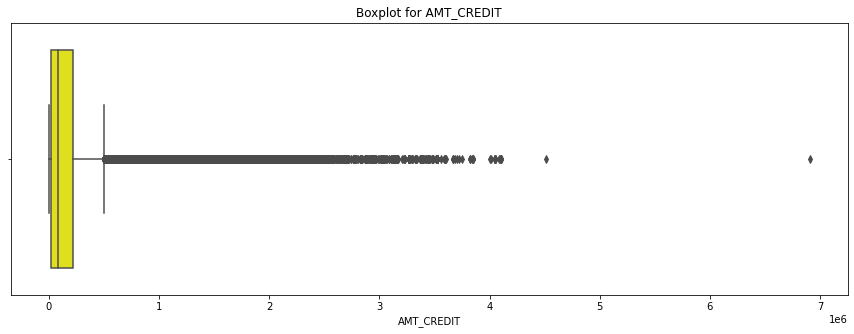

In [169]:
# Checking the Outliers
plt.figure(figsize=(15,5))
sns.boxplot(x="AMT_CREDIT",data=pre_data,color="Yellow")
plt.title("Boxplot for AMT_CREDIT")
plt.show()

**There are quite number of outliers in this dataframe, we either the delete the datapoints or we can create a separate categorical dataframe with its quantile values**

In [170]:
# Creating a separate dataframe
pre_data["CREDIT_AMOUNT"] = pd.qcut(x=pre_data.AMT_CREDIT,q=[0,0.2,0.4,0.6,0.8,1],labels=["Low","Medium","High","Very High"],duplicates="drop")

In [171]:
pre_data.head(1)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,AMOUNT_GOODSPRICE,CREDIT_AMOUNT
0,2030495,271877,Consumer loans,1730.43,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,Very Low,Low


In [172]:
# Ensuring that all Null values are dealt with
pre_data.isnull().sum()

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_ANNUITY                    0
AMT_APPLICATION                0
AMT_CREDIT                     0
AMT_GOODS_PRICE                0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
FLAG_LAST_APPL_PER_CONTRACT    0
NFLAG_LAST_APPL_IN_DAY         0
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
SELLERPLACE_AREA               0
NAME_SELLER_INDUSTRY           0
CNT_PAYMENT                    0
NAME_YIELD_GROUP               0
PRODUCT_COMBINATION            0
AMOUNT_GOODSPRICE              0
CREDIT_AMOUNT                  0
dtype: int64

In [173]:
# Checking the categorical columns
list(set(pre_data.columns) - set(pre_data.describe()))

['NAME_CASH_LOAN_PURPOSE',
 'NAME_PORTFOLIO',
 'WEEKDAY_APPR_PROCESS_START',
 'NAME_YIELD_GROUP',
 'PRODUCT_COMBINATION',
 'NAME_SELLER_INDUSTRY',
 'NAME_CONTRACT_TYPE',
 'NAME_PRODUCT_TYPE',
 'CODE_REJECT_REASON',
 'NAME_PAYMENT_TYPE',
 'NAME_GOODS_CATEGORY',
 'NAME_CLIENT_TYPE',
 'CREDIT_AMOUNT',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'NAME_CONTRACT_STATUS',
 'AMOUNT_GOODSPRICE',
 'CHANNEL_TYPE']

### NAME_PORTFOLIO column

In [174]:
# Checking the Null values in the column
pre_data.NAME_PORTFOLIO.value_counts(normalize=True)*100

POS      41.372603
Cash     27.634962
XNA      22.286366
Cards     8.680624
Cars      0.025446
Name: NAME_PORTFOLIO, dtype: float64

**This column has over 22% data as XNA. We could replace it with mode but that will heavily skew our analysis towards POS. We can delete the datapoints with XNA but it is not required as per the Case Study requirement. So we will keep the data as it is but will change its category to Unknown for better readibility. Also the it seems that there has been error while capturing the the data as we have category as Cars. It seems that the data should have been captured in Cards. So we are making these changes in this column**

In [175]:
pre_data.NAME_PORTFOLIO.replace(["XNA","Cars"],["Unknown","Cards"],inplace=True)

In [176]:
# Confirming the changes has been done
pre_data.NAME_PORTFOLIO.value_counts(normalize=True)*100

POS        41.372603
Cash       27.634962
Unknown    22.286366
Cards       8.706070
Name: NAME_PORTFOLIO, dtype: float64

### NAME_CLIENT_TYPE column

In [177]:
# Checking for Null values
pre_data.NAME_CLIENT_TYPE.value_counts()
# We can see that the small number of values are Null, we can safely replace it with mode i.e Repeater

Repeater     1231261
New           301363
Refreshed     135649
XNA             1941
Name: NAME_CLIENT_TYPE, dtype: int64

In [178]:
pre_data.NAME_CLIENT_TYPE.replace(["XNA"],pre_data.NAME_CLIENT_TYPE.mode(),inplace=True)

In [179]:
# Confirming the changes
pre_data.NAME_CLIENT_TYPE.value_counts()

Repeater     1233202
New           301363
Refreshed     135649
Name: NAME_CLIENT_TYPE, dtype: int64

### NAME_YIELD_GROUP column

In [180]:
pre_data.NAME_YIELD_GROUP.value_counts()

XNA           517215
middle        385532
high          353331
low_normal    322095
low_action     92041
Name: NAME_YIELD_GROUP, dtype: int64

**Since XNA is the largest category, we can simply rename it to Unknown for better readibility**

In [181]:
pre_data.NAME_YIELD_GROUP.replace(["XNA"],"Unknown",inplace=True)

In [182]:
pre_data.NAME_YIELD_GROUP.value_counts()

Unknown       517215
middle        385532
high          353331
low_normal    322095
low_action     92041
Name: NAME_YIELD_GROUP, dtype: int64

In [183]:
pre_data.FLAG_LAST_APPL_PER_CONTRACT.unique() # Seems correct

array(['Y', 'N'], dtype=object)

### NAME_GOODS_CATEGORY column

In [184]:
# Checking for Null values in this categorical column
pre_data.NAME_GOODS_CATEGORY.value_counts()

XNA                         950809
Mobile                      224708
Consumer Electronics        121576
Computers                   105769
Audio/Video                  99441
Furniture                    53656
Photo / Cinema Equipment     25021
Construction Materials       24995
Clothing and Accessories     23554
Auto Accessories              7381
Jewelry                       6290
Homewares                     5023
Medical Supplies              3843
Vehicles                      3370
Sport and Leisure             2981
Gardening                     2668
Other                         2554
Office Appliances             2333
Tourism                       1659
Medicine                      1550
Direct Sales                   446
Fitness                        209
Additional Service             128
Education                      107
Weapon                          77
Insurance                       64
Animals                          1
House Construction               1
Name: NAME_GOODS_CAT

In [185]:
# Replacing the null values to Unknown as it is the largest proportion of this data column is Null and it cannot be deleted
pre_data.NAME_GOODS_CATEGORY.replace(["XNA"],"Unknown",inplace=True)

In [186]:
pre_data.NAME_GOODS_CATEGORY.unique() # XNA has been replaced

array(['Mobile', 'Unknown', 'Consumer Electronics',
       'Construction Materials', 'Auto Accessories',
       'Photo / Cinema Equipment', 'Computers', 'Audio/Video', 'Medicine',
       'Clothing and Accessories', 'Furniture', 'Sport and Leisure',
       'Homewares', 'Gardening', 'Jewelry', 'Vehicles', 'Education',
       'Medical Supplies', 'Other', 'Direct Sales', 'Office Appliances',
       'Fitness', 'Tourism', 'Insurance', 'Additional Service', 'Weapon',
       'Animals', 'House Construction'], dtype=object)

### NAME_PRODUCT_TYPE column

In [187]:
# Checking this column for null values
pre_data.NAME_PRODUCT_TYPE.value_counts(normalize=True)*100

XNA        63.684414
x-sell     27.319074
walk-in     8.996512
Name: NAME_PRODUCT_TYPE, dtype: float64

In [188]:
# This column has 63% data as Null, we will keep the data with replacing XNA with Not Known
pre_data.NAME_PRODUCT_TYPE.replace(["XNA"],"Not Known",inplace=True)

In [189]:
# Checking unique values to ascertain the replacement has been done 
pre_data.NAME_PRODUCT_TYPE.unique()

array(['Not Known', 'x-sell', 'walk-in'], dtype=object)

### NAME_PAYMENT_TYPE column

In [190]:
pre_data.NAME_PAYMENT_TYPE.value_counts(normalize=True)*100

Cash through the bank                        61.881412
XNA                                          37.563091
Non-cash from your account                    0.490536
Cashless from the account of the employer     0.064962
Name: NAME_PAYMENT_TYPE, dtype: float64

In [191]:
# As done above, we will replace the XNA with Not Known
pre_data.NAME_PAYMENT_TYPE.replace(["XNA"],"Not Known",inplace=True)

In [192]:
pre_data.NAME_PAYMENT_TYPE.unique() # Checking that the null values are replaced

array(['Cash through the bank', 'Not Known', 'Non-cash from your account',
       'Cashless from the account of the employer'], dtype=object)

### NAME_SELLER_INDUSTRY column

In [193]:
# Checking for null values in the column
pre_data.NAME_SELLER_INDUSTRY.value_counts(normalize=True)*100

XNA                     51.234153
Consumer electronics    23.845148
Connectivity            16.526565
Furniture                3.463568
Construction             1.783065
Clothing                 1.433888
Industry                 1.149194
Auto technology          0.298764
Jewelry                  0.162195
MLM partners             0.072745
Tourism                  0.030715
Name: NAME_SELLER_INDUSTRY, dtype: float64

In [194]:
# Since the null values are 51% of the data column, we will replace it with Unknown for better readibility
pre_data.NAME_SELLER_INDUSTRY.replace(["XNA"],"Unknown",inplace=True)

In [195]:
pre_data.NAME_SELLER_INDUSTRY.value_counts(normalize=True)*100
# Checking the replacement

Unknown                 51.234153
Consumer electronics    23.845148
Connectivity            16.526565
Furniture                3.463568
Construction             1.783065
Clothing                 1.433888
Industry                 1.149194
Auto technology          0.298764
Jewelry                  0.162195
MLM partners             0.072745
Tourism                  0.030715
Name: NAME_SELLER_INDUSTRY, dtype: float64

In [196]:
pre_data.CHANNEL_TYPE.unique() # No null values

array(['Country-wide', 'Contact center', 'Credit and cash offices',
       'Stone', 'Regional / Local', 'AP+ (Cash loan)',
       'Channel of corporate sales', 'Car dealer'], dtype=object)

### NAME_CONTRACT_TYPE column

In [197]:
pre_data.NAME_CONTRACT_TYPE.value_counts()

Cash loans         747553
Consumer loans     729151
Revolving loans    193164
XNA                   346
Name: NAME_CONTRACT_TYPE, dtype: int64

In [198]:
# Since the XNA values are miniscule we can merge it with the mode of the column
pre_data.NAME_CONTRACT_TYPE.replace(["XNA"],pre_data.NAME_CONTRACT_TYPE.mode(),inplace=True)

In [199]:
pre_data.NAME_CONTRACT_TYPE.unique() # XNA replaced

array(['Consumer loans', 'Cash loans', 'Revolving loans'], dtype=object)

#### The columns NAME_CASH_LOAN_PURPOSE and CODE_REJECT_REASON has XNA and XAP as major values. We are keeping it as it is

In [200]:
pre_data.NAME_CASH_LOAN_PURPOSE.value_counts(normalize=True)*100

XAP                                 55.242083
XNA                                 40.588691
Repairs                              1.422872
Other                                0.934491
Urgent needs                         0.503648
Buying a used car                    0.172912
Building a house or an annex         0.161237
Everyday expenses                    0.144652
Medicine                             0.130163
Payments on other loans              0.115614
Education                            0.094180
Journey                              0.074182
Purchase of electronic equipment     0.063525
Buying a new car                     0.060591
Wedding / gift / holiday             0.057597
Buying a home                        0.051790
Car repairs                          0.047718
Furniture                            0.044845
Buying a holiday home / land         0.031912
Business development                 0.025506
Gasification / water supply          0.017962
Buying a garage                   

In [201]:
pre_data.CODE_REJECT_REASON.value_counts(normalize=True)*100 

XAP       81.013152
HC        10.491530
LIMIT      3.333705
SCO        2.243245
CLIENT     1.582791
SCOFR      0.767027
XNA        0.313972
VERIF      0.211650
SYSTEM     0.042929
Name: CODE_REJECT_REASON, dtype: float64

In [202]:
pre_data.WEEKDAY_APPR_PROCESS_START.unique() # Seems fine, no Null values

array(['SATURDAY', 'THURSDAY', 'TUESDAY', 'MONDAY', 'FRIDAY', 'SUNDAY',
       'WEDNESDAY'], dtype=object)

In [203]:
# Converting the negative values to absolute
pre_data.DAYS_DECISION = abs(pre_data.DAYS_DECISION)

In [204]:
pre_data.SELLERPLACE_AREA = abs(pre_data.SELLERPLACE_AREA )

In [205]:
pre_data.head(3) # Checking whether the above codes have run properly

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,AMOUNT_GOODSPRICE,CREDIT_AMOUNT
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,73,Cash through the bank,XAP,Repeater,Mobile,POS,Not Known,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,Very Low,Low
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,XNA,Approved,164,Not Known,XAP,Repeater,Unknown,Cash,x-sell,Contact center,1,Unknown,36.0,low_action,Cash X-Sell: low,High,Very High
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,XNA,Approved,301,Cash through the bank,XAP,Repeater,Unknown,Cash,x-sell,Credit and cash offices,1,Unknown,12.0,high,Cash X-Sell: high,Medium,High


# Merging both the data csv files for final analysis

In [206]:
# Merging the two csv files
Merged_Data = pd.merge(app_data,pre_data,on="SK_ID_CURR")

In [207]:
Merged_Data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMOUNT_GOODSPRICE_x,AMOUNT_ANNUITY,AGE,AGE_GROUP,CUST_INCOME,LOAN_AMT,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,AMOUNT_GOODSPRICE_y,CREDIT_AMOUNT
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,Low,Medium,26.0,<30,High,Low,1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,SATURDAY,9,Y,1,XAP,Approved,606,Not Known,XAP,New,Vehicles,POS,Not Known,Stone,500,Auto technology,24.0,low_normal,POS other with interest,Medium,High
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.510853,1.0,0.0,1.0,0.0,828,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Very High,High,46.0,40-50,Very High,Very High,1810518,Cash loans,98356.995,900000.0,1035882.0,900000.0,FRIDAY,12,Y,1,XNA,Approved,746,Not Known,XAP,Repeater,Unknown,Cash,x-sell,Credit and cash offices,1,Unknown,12.0,low_normal,Cash X-Sell: low,High,Very High
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.510853,1.0,0.0,1.0,0.0,828,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Very High,High,46.0,40-50,Very High,Very High,2636178,Consumer loans,64567.665,337500.0,348637.5,337500.0,SUNDAY,17,Y,1,XAP,Approved,828,Cash through the bank,XAP,Refreshed,Furniture,POS,Not Known,Stone,1400,Furniture,6.0,middle,POS industry with interest,High,Very High
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.510853,1.0,0.0,1.0,0.0,828,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [208]:
# Creating two separate variables for Defaulters and Customers with no payment issue
MergeData_Defaulters = Merged_Data[Merged_Data.TARGET==1] 
MergeData_Noissue = Merged_Data[Merged_Data.TARGET==0]

In [230]:
# Checking for the Contract Status of the merged data set 
Merged_Data.NAME_CONTRACT_STATUS.value_counts(normalize=True)*100

Approved        62.679378
Canceled        18.351900
Refused         17.357984
Unused offer     1.610737
Name: NAME_CONTRACT_STATUS, dtype: float64

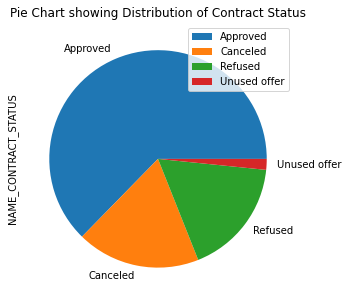

In [209]:
# Checking the Contract Status of the Merged Data in a piechart
plt.figure(figsize=(15,5))
Merged_Data.NAME_CONTRACT_STATUS.value_counts(normalize=True).plot.pie()
plt.legend()
plt.title("Pie Chart showing Distribution of Contract Status")
plt.show()

In [232]:
MergeData_Defaulters.NAME_CONTRACT_STATUS.value_counts(normalize=True)*100

Approved        54.955051
Refused         24.058516
Canceled        19.450801
Unused offer     1.535633
Name: NAME_CONTRACT_STATUS, dtype: float64

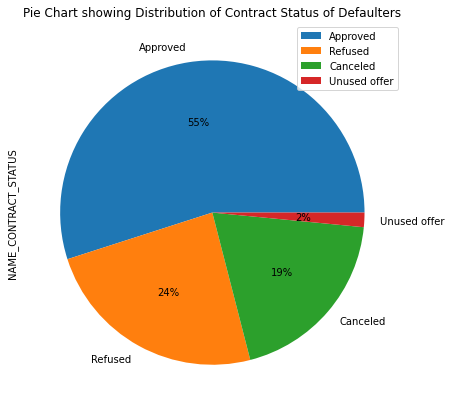

In [333]:
# Checking the Contract Status of the Merged Data set of the Defaulters vs Loan Payers
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
MergeData_Defaulters.NAME_CONTRACT_STATUS.value_counts(normalize=True).plot.pie(autopct='%.f%%')
plt.legend()
plt.title("Pie Chart showing Distribution of Contract Status of Defaulters")

plt.show()

**It can be seen that around 24% defaulters were refused the loan in the previous application which were given the loan. This should have been considered while giving the loan**

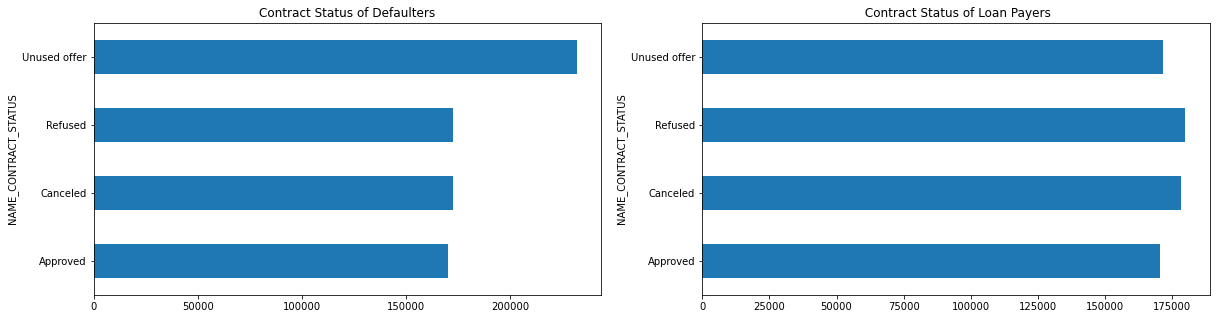

In [211]:
# Checking Contract Status with respect to Income of the Customers
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
MergeData_Defaulters.groupby("NAME_CONTRACT_STATUS")["AMT_INCOME_TOTAL"].mean().plot.barh()
plt.title("Contract Status of Defaulters")

plt.subplot(1,2,2)
MergeData_Noissue.groupby("NAME_CONTRACT_STATUS")["AMT_INCOME_TOTAL"].mean().plot.barh()
plt.title(" Contract Status of Loan Payers")

plt.show()

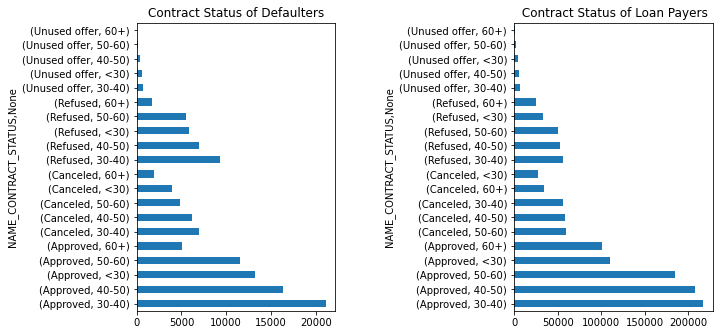

In [227]:
# Checking Contract Status with respect to Age of the Customers
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
MergeData_Defaulters.groupby("NAME_CONTRACT_STATUS")["AGE_GROUP"].value_counts().plot.barh()
plt.title("Contract Status of Defaulters")

plt.subplot(1,2,2)
MergeData_Noissue.groupby("NAME_CONTRACT_STATUS")["AGE_GROUP"].value_counts().plot.barh()
plt.title(" Contract Status of Loan Payers")

# Adjusting the spacing within the subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.9, 
                    hspace=0.4)

plt.show()

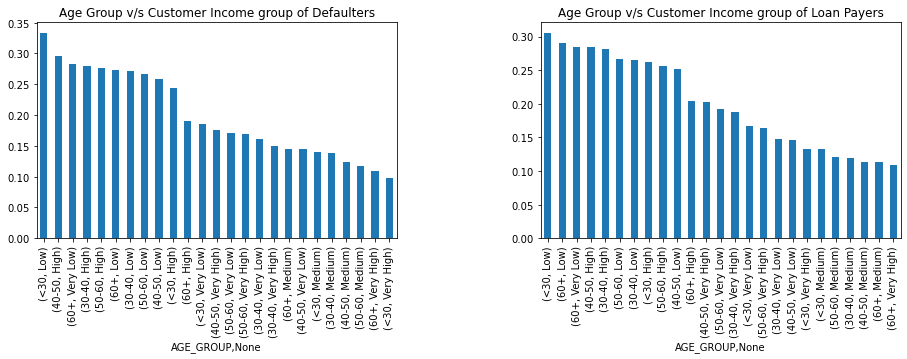

In [253]:
# Checking Age Group vs Cust Income of the Customers
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
MergeData_Defaulters.groupby("AGE_GROUP")["CUST_INCOME"].value_counts(normalize=True).sort_values(ascending=False).plot.bar()
plt.title("Age Group v/s Customer Income group of Defaulters")


plt.subplot(1,2,2)
MergeData_Noissue.groupby("AGE_GROUP")["CUST_INCOME"].value_counts(normalize=True).sort_values(ascending=False).plot.bar()
plt.title("Age Group v/s Customer Income group of Loan Payers")

# Adjusting the spacing within the subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.3, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.6)

plt.show()

**It can be seen that majority of the defaulters are from low income**

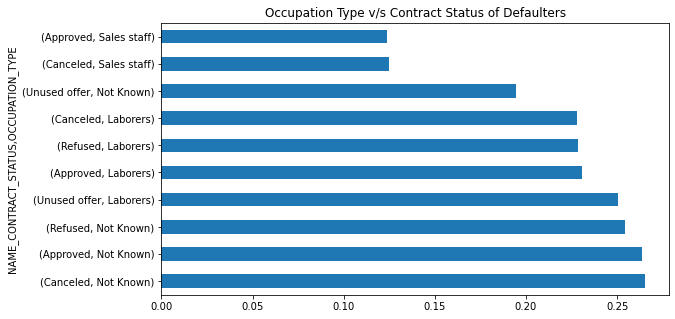

In [282]:
# Defaulters with respect to OCCUPATION_TYPE and NAME_CONTRACT_STATUS

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
MergeData_Defaulters.groupby("NAME_CONTRACT_STATUS")["OCCUPATION_TYPE"].value_counts(normalize=True).sort_values(ascending=False).head(10).plot.barh()
plt.title("Occupation Type v/s Contract Status of Defaulters")

plt.show()

**It can be observed that majority of the defaulters are Laborers who majorly have low income levels.**

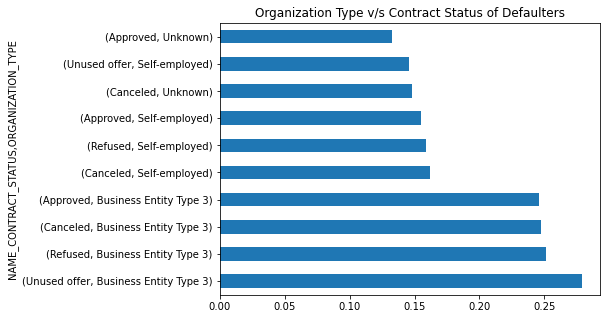

In [284]:
# Defaulters ORGANIATION V/s NAME_CONTRACT_STATUS
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
MergeData_Defaulters.groupby("NAME_CONTRACT_STATUS")["ORGANIZATION_TYPE"].value_counts(normalize=True).sort_values(ascending=False).head(10).plot.barh()
plt.title("Organization Type v/s Contract Status of Defaulters")

plt.show()

**Most of the defaulters are the ones with Business Entity Type - 3 and Self-Employed.**

## Multivariate Analysis

### Correlations

In [312]:
# Gender vs Customer Income vs Defaulters
Gender_Income = pd.pivot_table(data=Merged_Data, index='CODE_GENDER', columns='CUST_INCOME', values='TARGET')

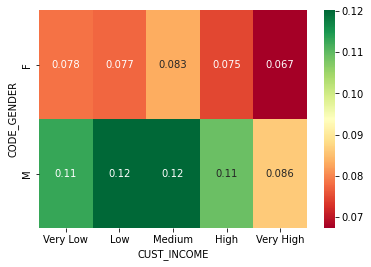

In [313]:
sns.heatmap(Gender_Income, annot=True, cmap="RdYlGn")
plt.show()

**We can see that there is strong correlation between Females and Medium Income group, Males and Very High Income group among Defaulters**

In [314]:
# Education vs Customer Income vs Defaulters
Edu_Income = pd.pivot_table(data=Merged_Data, index='NAME_EDUCATION_TYPE', columns='CUST_INCOME', values='TARGET')

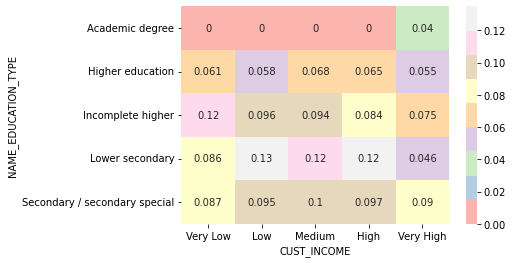

In [318]:
sns.heatmap(Edu_Income, annot=True, cmap="Pastel1")
plt.show()

**Lower Education levels and Lower Salary levels show strong corelation while defaulting loans**

In [329]:
House_Income = pd.pivot_table(data=Merged_Data, index='NAME_HOUSING_TYPE', columns='CUST_INCOME', values='TARGET')

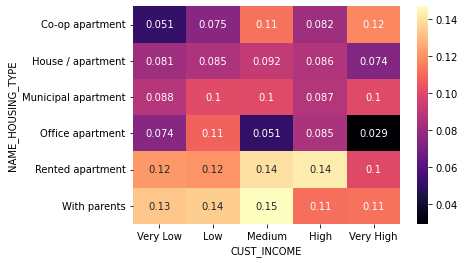

In [330]:
sns.heatmap(House_Income, annot=True, cmap="magma")
plt.show()

**We can observe that there is strong correlation with all income levels and customers Owning House have defaulted while customers staying with parents or on rent have very weak correlation with defaults**

# Observations

**Following observations can be made from datasets provided and analysed**

- 1. Majorly customers defaulted the cash loans.
- 2. Females were mostly the defaulters but also they were major customers who paid the Loans on time
- 3. The Secondary level education customers were the defaulters
- 4. Working class customers were major defaulters but also major customers paying the loan
- 5. As the no. of family members and children increased customers were more inclined to pay loans on time
- 6. Low Salary was the main cause for the defaults
- 7. People who were self employed or who worked for Business Entity Type 3 were major defaulters
- 8. People who worked as Laborers were most defaulters 